In [1]:
#ASSIGNMENT 2

In [2]:
#1. Load library & dataset
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import normalized_mutual_info_score
from scipy.stats import entropy

In [3]:
data_price_demand = pd.read_csv('price_and_demand.csv', header=None)
data_weather = pd.read_csv('weather.csv', encoding= 'unicode_escape')

## 1. DATA CLEANING ##

In [4]:
#1.1 data_price_demand

In [5]:
display(data_price_demand.head())

,0,1,2,3,4
0,VIC1,1/11/2022 0:30,4178.18,8.94,TRADE
1,VIC1,1/11/2022 1:00,4086.02,0.14,TRADE
2,VIC1,1/11/2022 1:30,4033.37,0.02,TRADE
3,VIC1,1/11/2022 2:00,3985.64,0.00,TRADE
4,VIC1,1/11/2022 2:30,3885.64,0.02,TRADE


In [6]:
# Add header name to the dataframe:
header_names = ['State', 'Date_Time', 'Demand (MW)', 'Price', 'Trade_Status']
data_price_demand.columns = header_names

In [7]:
print(data_price_demand.dtypes)

State            object
Date_Time        object
Demand (MW)     float64
Price           float64
Trade_Status     object
dtype: object


In [8]:
# Convert the date column to a datetime data type
data_price_demand['Date_Time'] = pd.to_datetime(data_price_demand['Date_Time'], format='%d/%m/%Y %H:%M')

In [9]:
# Re-examine datatype:
print(data_price_demand.dtypes)

State                   object
Date_Time       datetime64[ns]
Demand (MW)            float64
Price                  float64
Trade_Status            object
dtype: object


In [10]:
# Check for missing value
print(data_price_demand.isnull().sum())

State           0
Date_Time       0
Demand (MW)     0
Price           0
Trade_Status    0
dtype: int64


In [11]:
# Unique values in each columns:
for column in data_price_demand.columns:
    unique_values = data_price_demand[column].unique()
    print(f"'{column}': {unique_values}")

'State': ['VIC1']
'Date_Time': ['2022-11-01T00:30:00.000000000' '2022-11-01T01:00:00.000000000'
 '2022-11-01T01:30:00.000000000' ... '2023-04-23T23:00:00.000000000'
 '2023-04-23T23:30:00.000000000' '2023-04-24T00:00:00.000000000']
'Demand (MW)': [4178.18 4086.02 4033.37 ... 4472.49 4621.36 4395.96]
'Price': [8.940e+00 1.400e-01 2.000e-02 ... 8.125e+01 9.397e+01 8.396e+01]
'Trade_Status': ['TRADE']


In [12]:
#All states are VICTORIA in TRADE type.
#Calculate total demand for each day:
data_price_demand['Date'] = data_price_demand['Date_Time'].dt.date # Extract only the date from the datetime

In [13]:
print(data_price_demand['Date'])

0       2022-11-01
1       2022-11-01
2       2022-11-01
3       2022-11-01
4       2022-11-01
           ...    
8347    2023-04-23
8348    2023-04-23
8349    2023-04-23
8350    2023-04-23
8351    2023-04-24
Name: Date, Length: 8352, dtype: object


In [14]:
sum_of_demand = data_price_demand.groupby('Date')['Demand (MW)'].sum().round(2)

In [15]:
print(sum_of_demand)

Date
2022-11-01    207429.46
2022-11-02    233630.93
2022-11-03    235672.34
2022-11-04    224895.28
2022-11-05    189190.35
                ...    
2023-04-20    227925.10
2023-04-21    232043.13
2023-04-22    207431.82
2023-04-23    195560.35
2023-04-24      4395.96
Name: Demand (MW), Length: 175, dtype: float64


In [16]:
daily_demand_df = sum_of_demand.reset_index()

In [17]:
#Create a new dataframe with date and sum of demand:
print(daily_demand_df)

           Date  Demand (MW)
0    2022-11-01    207429.46
1    2022-11-02    233630.93
2    2022-11-03    235672.34
3    2022-11-04    224895.28
4    2022-11-05    189190.35
..          ...          ...
170  2023-04-20    227925.10
171  2023-04-21    232043.13
172  2023-04-22    207431.82
173  2023-04-23    195560.35
174  2023-04-24      4395.96

[175 rows x 2 columns]


In [18]:
print(daily_demand_df.dtypes)

Date            object
Demand (MW)    float64
dtype: object


In [19]:
#Convert Date to datetime
daily_demand_df['Date'] = pd.to_datetime(daily_demand_df['Date'])

In [20]:
print(daily_demand_df.dtypes)

Date           datetime64[ns]
Demand (MW)           float64
dtype: object


In [21]:
daily_demand_df.to_csv("daily_demand_df.csv", index=False)

In [22]:
data_price_demand

,State,Date_Time,Demand (MW),Price,Trade_Status,Date
0,VIC1,2022-11-01 00:30:00,4178.18,8.94,TRADE,2022-11-01
1,VIC1,2022-11-01 01:00:00,4086.02,0.14,TRADE,2022-11-01
2,VIC1,2022-11-01 01:30:00,4033.37,0.02,TRADE,2022-11-01
3,VIC1,2022-11-01 02:00:00,3985.64,0.00,TRADE,2022-11-01
4,VIC1,2022-11-01 02:30:00,3885.64,0.02,TRADE,2022-11-01
...,...,...,...,...,...,...
8347,VIC1,2023-04-23 22:00:00,4717.55,84.09,TRADE,2023-04-23
8348,VIC1,2023-04-23 22:30:00,4520.39,81.25,TRADE,2023-04-23
8349,VIC1,2023-04-23 23:00:00,4472.49,93.97,TRADE,2023-04-23
8350,VIC1,2023-04-23 23:30:00,4621.36,83.96,TRADE,2023-04-23


In [23]:
#Daily total usage == maximum daily total usage in this assignment

In [24]:
print(data_weather)

                               Location        Date  Minimum temperature (°C)  \
0    Melbourne (Olympic Park), Victoria   1/11/2022                       8.5   
1    Melbourne (Olympic Park), Victoria   2/11/2022                       6.9   
2    Melbourne (Olympic Park), Victoria   3/11/2022                       9.1   
3    Melbourne (Olympic Park), Victoria   4/11/2022                      10.2   
4    Melbourne (Olympic Park), Victoria   5/11/2022                      11.8   
..                                  ...         ...                       ...   
170  Melbourne (Olympic Park), Victoria  20/04/2023                       7.8   
171  Melbourne (Olympic Park), Victoria  21/04/2023                      11.3   
172  Melbourne (Olympic Park), Victoria  22/04/2023                      14.6   
173  Melbourne (Olympic Park), Victoria  23/04/2023                      14.8   
174  Melbourne (Olympic Park), Victoria  24/04/2023                      11.0   

     Maximum temperature (°

In [25]:
data_weather.shape

(175, 22)

In [26]:
print(data_weather.isnull().sum())

Location                               0
Date                                   0
Minimum temperature (°C)               0
Maximum temperature (°C)               1
Rainfall (mm)                          0
Evaporation (mm)                     175
Sunshine (hours)                     175
Direction of maximum wind gust         1
Speed of maximum wind gust (km/h)      1
Time of maximum wind gust              1
9am Temperature (°C)                   0
9am relative humidity (%)              0
9am cloud amount (oktas)             175
9am wind direction                     0
9am wind speed (km/h)                  0
9am MSL pressure (hPa)                 0
3pm Temperature (°C)                   1
3pm relative humidity (%)              1
3pm cloud amount (oktas)             175
3pm wind direction                     1
3pm wind speed (km/h)                  1
3pm MSL pressure (hPa)                 1
dtype: int64


In [27]:
#Drop empty columns
data_weather.drop(columns=['Evaporation (mm)', 'Sunshine (hours)', '9am cloud amount (oktas)', '3pm cloud amount (oktas)'], inplace=True)

In [28]:
display(data_weather.head())

,Location,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,"Melbourne (Olympic Park), Victoria",1/11/2022,8.5,13.3,3.0,SW,44.0,11:36,12.0,64,NW,13,991.3,13.2,59.0,WNW,11.0,991.5
1,"Melbourne (Olympic Park), Victoria",2/11/2022,6.9,15.7,2.8,SSW,43.0,11:33,11.0,65,W,9,1006.7,15.1,54.0,SSW,13.0,1008.4
2,"Melbourne (Olympic Park), Victoria",3/11/2022,9.1,15.4,0.4,SSW,31.0,8:07,11.5,70,SSW,9,1019.2,13.8,67.0,SSW,9.0,1021.3
3,"Melbourne (Olympic Park), Victoria",4/11/2022,10.2,17.8,0.2,S,24.0,14:50,12.3,84,WSW,6,1028.1,16.9,56.0,SW,9.0,1026.6
4,"Melbourne (Olympic Park), Victoria",5/11/2022,11.8,22.7,0.0,N,31.0,11:58,14.0,78,N,9,1026.3,18.8,65.0,SW,11.0,1023.2


In [29]:
# Unique values in each columns to examine value range and current data types in the columns
for column in data_weather.columns:
    unique_values = data_weather[column].unique()
    print(f"'{column}': {unique_values}")

'Location': ['Melbourne (Olympic Park), Victoria']
'Date': ['1/11/2022' '2/11/2022' '3/11/2022' '4/11/2022' '5/11/2022' '6/11/2022'
 '7/11/2022' '8/11/2022' '9/11/2022' '10/11/2022' '11/11/2022'
 '12/11/2022' '13/11/2022' '14/11/2022' '15/11/2022' '16/11/2022'
 '17/11/2022' '18/11/2022' '19/11/2022' '20/11/2022' '21/11/2022'
 '22/11/2022' '23/11/2022' '24/11/2022' '25/11/2022' '26/11/2022'
 '27/11/2022' '28/11/2022' '29/11/2022' '30/11/2022' '1/12/2022'
 '2/12/2022' '3/12/2022' '4/12/2022' '5/12/2022' '6/12/2022' '7/12/2022'
 '8/12/2022' '9/12/2022' '10/12/2022' '11/12/2022' '12/12/2022'
 '13/12/2022' '14/12/2022' '15/12/2022' '16/12/2022' '17/12/2022'
 '18/12/2022' '19/12/2022' '20/12/2022' '21/12/2022' '22/12/2022'
 '23/12/2022' '24/12/2022' '25/12/2022' '26/12/2022' '27/12/2022'
 '28/12/2022' '29/12/2022' '30/12/2022' '31/12/2022' '1/01/2023'
 '2/01/2023' '3/01/2023' '4/01/2023' '5/01/2023' '6/01/2023' '7/01/2023'
 '8/01/2023' '9/01/2023' '10/01/2023' '11/01/2023' '12/01/2023'
 '13/

In [30]:
print(data_weather.dtypes)

Location                              object
Date                                  object
Minimum temperature (°C)             float64
Maximum temperature (°C)             float64
Rainfall (mm)                        float64
Direction of maximum wind gust        object
Speed of maximum wind gust (km/h)    float64
Time of maximum wind gust             object
9am Temperature (°C)                 float64
9am relative humidity (%)              int64
9am wind direction                    object
9am wind speed (km/h)                 object
9am MSL pressure (hPa)               float64
3pm Temperature (°C)                 float64
3pm relative humidity (%)            float64
3pm wind direction                    object
3pm wind speed (km/h)                float64
3pm MSL pressure (hPa)               float64
dtype: object


In [31]:
# DELETE Location                             
# Date need to be converted into date_time
# DELETE Direction of maximum wind gust       
# DELETE Time of maximum wind gust            
# DELETE 9am wind direction
# 9am wind speed (km/h) needs to be changed into int, also need to change the 'Calm' note into value
# DELETE 3pm wind direction

In [32]:
data_weather.drop(columns=['Location', 'Direction of maximum wind gust ', 'Time of maximum wind gust', '9am wind direction', '3pm wind direction'], inplace=True)

In [33]:
data_weather.head()

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind speed (km/h),3pm MSL pressure (hPa)
0,1/11/2022,8.5,13.3,3.0,44.0,12.0,64,13,991.3,13.2,59.0,11.0,991.5
1,2/11/2022,6.9,15.7,2.8,43.0,11.0,65,9,1006.7,15.1,54.0,13.0,1008.4
2,3/11/2022,9.1,15.4,0.4,31.0,11.5,70,9,1019.2,13.8,67.0,9.0,1021.3
3,4/11/2022,10.2,17.8,0.2,24.0,12.3,84,6,1028.1,16.9,56.0,9.0,1026.6
4,5/11/2022,11.8,22.7,0.0,31.0,14.0,78,9,1026.3,18.8,65.0,11.0,1023.2


In [34]:
# Convert date into date_time
data_weather['Date'] = pd.to_datetime(data_weather['Date'], format='%d/%m/%Y')

In [35]:
data_weather.head()

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind speed (km/h),3pm MSL pressure (hPa)
0,2022-11-01,8.5,13.3,3.0,44.0,12.0,64,13,991.3,13.2,59.0,11.0,991.5
1,2022-11-02,6.9,15.7,2.8,43.0,11.0,65,9,1006.7,15.1,54.0,13.0,1008.4
2,2022-11-03,9.1,15.4,0.4,31.0,11.5,70,9,1019.2,13.8,67.0,9.0,1021.3
3,2022-11-04,10.2,17.8,0.2,24.0,12.3,84,6,1028.1,16.9,56.0,9.0,1026.6
4,2022-11-05,11.8,22.7,0.0,31.0,14.0,78,9,1026.3,18.8,65.0,11.0,1023.2


In [36]:
print(data_weather.dtypes)

Date                                 datetime64[ns]
Minimum temperature (°C)                    float64
Maximum temperature (°C)                    float64
Rainfall (mm)                               float64
Speed of maximum wind gust (km/h)           float64
9am Temperature (°C)                        float64
9am relative humidity (%)                     int64
9am wind speed (km/h)                        object
9am MSL pressure (hPa)                      float64
3pm Temperature (°C)                        float64
3pm relative humidity (%)                   float64
3pm wind speed (km/h)                       float64
3pm MSL pressure (hPa)                      float64
dtype: object


In [37]:
#Clean 9am wind speed (km/h). Count value in the column:
value_counts = data_weather['9am wind speed (km/h)'].value_counts()
print(value_counts)

9       40
7       35
13      21
6       17
11      17
15      10
Calm     9
4        8
17       5
2        4
19       3
20       3
22       2
24       1
Name: 9am wind speed (km/h), dtype: int64


In [38]:
#As calm == 0 windspeed, replace Calm with 0:
data_weather['9am wind speed (km/h)'] = data_weather['9am wind speed (km/h)'].replace('Calm', 0)

In [39]:
#Examine the column again
value_counts = data_weather['9am wind speed (km/h)'].value_counts()
print(value_counts)

9     40
7     35
13    21
6     17
11    17
15    10
0      9
4      8
17     5
2      4
19     3
20     3
22     2
24     1
Name: 9am wind speed (km/h), dtype: int64


In [40]:
# Change the column into int:
data_weather['9am wind speed (km/h)'] = data_weather['9am wind speed (km/h)'].astype(int)

In [41]:
#Check if we change it successfully
print(data_weather.dtypes)

Date                                 datetime64[ns]
Minimum temperature (°C)                    float64
Maximum temperature (°C)                    float64
Rainfall (mm)                               float64
Speed of maximum wind gust (km/h)           float64
9am Temperature (°C)                        float64
9am relative humidity (%)                     int64
9am wind speed (km/h)                         int64
9am MSL pressure (hPa)                      float64
3pm Temperature (°C)                        float64
3pm relative humidity (%)                   float64
3pm wind speed (km/h)                       float64
3pm MSL pressure (hPa)                      float64
dtype: object


In [42]:
#Examine data frame again
print(data_weather.isnull().sum())

Date                                 0
Minimum temperature (°C)             0
Maximum temperature (°C)             1
Rainfall (mm)                        0
Speed of maximum wind gust (km/h)    1
9am Temperature (°C)                 0
9am relative humidity (%)            0
9am wind speed (km/h)                0
9am MSL pressure (hPa)               0
3pm Temperature (°C)                 1
3pm relative humidity (%)            1
3pm wind speed (km/h)                1
3pm MSL pressure (hPa)               1
dtype: int64


In [43]:
# Where is the missing data?
null_values = data_weather.isnull()
rows_with_null = data_weather[null_values.any(axis=1)]
print(rows_with_null)

          Date  Minimum temperature (°C)  Maximum temperature (°C)  \
174 2023-04-24                      11.0                       NaN   

     Rainfall (mm)  Speed of maximum wind gust (km/h)  9am Temperature (°C)  \
174            0.0                                NaN                  14.3   

     9am relative humidity (%)  9am wind speed (km/h)  9am MSL pressure (hPa)  \
174                         87                      9                  1032.5   

     3pm Temperature (°C)  3pm relative humidity (%)  3pm wind speed (km/h)  \
174                   NaN                        NaN                    NaN   

     3pm MSL pressure (hPa)  
174                     NaN  


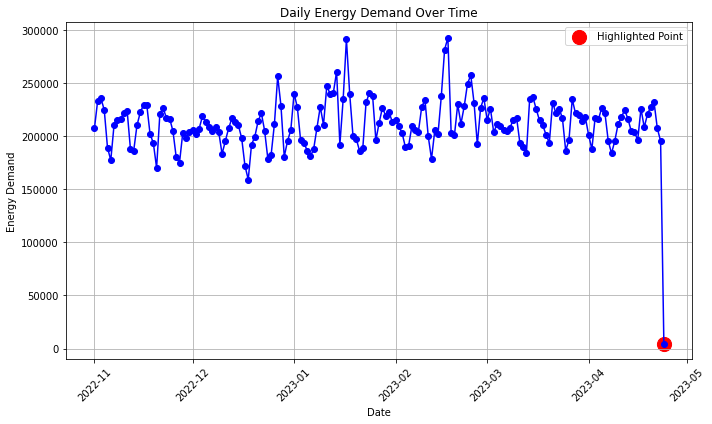

In [44]:
# Inspect the Demand dataset to examine the data on 24.04.23
plt.figure(figsize=(10, 6))
plt.plot(daily_demand_df['Date'], daily_demand_df['Demand (MW)'], marker='o', linestyle='-', color='b')
plt.scatter(daily_demand_df.loc[174, 'Date'], daily_demand_df.loc[174, 'Demand (MW)'], color='r', s=200, label='Highlighted Point')
plt.title('Daily Energy Demand Over Time')
plt.xlabel('Date')
plt.ylabel('Energy Demand')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [45]:
# As highlighted, the datapoint on the 24.04.23 is also an outliner on the Demand dataset, so we decided to drop the datapoint.
# Drop data row with missing data. 
data_weather.drop(174, inplace=True)

In [46]:
# Re-examine the data frame 
print(data_weather.isnull().sum())

Date                                 0
Minimum temperature (°C)             0
Maximum temperature (°C)             0
Rainfall (mm)                        0
Speed of maximum wind gust (km/h)    0
9am Temperature (°C)                 0
9am relative humidity (%)            0
9am wind speed (km/h)                0
9am MSL pressure (hPa)               0
3pm Temperature (°C)                 0
3pm relative humidity (%)            0
3pm wind speed (km/h)                0
3pm MSL pressure (hPa)               0
dtype: int64


In [47]:
# Check that the row has been dropped
data_weather.shape

(174, 13)

In [48]:
#Merge 2 dataset on Date column:
weather_demand_df = pd.merge(data_weather, daily_demand_df, how='left', on='Date')

In [49]:
weather_demand_df.head()

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind speed (km/h),3pm MSL pressure (hPa),Demand (MW)
0,2022-11-01,8.5,13.3,3.0,44.0,12.0,64,13,991.3,13.2,59.0,11.0,991.5,207429.46
1,2022-11-02,6.9,15.7,2.8,43.0,11.0,65,9,1006.7,15.1,54.0,13.0,1008.4,233630.93
2,2022-11-03,9.1,15.4,0.4,31.0,11.5,70,9,1019.2,13.8,67.0,9.0,1021.3,235672.34
3,2022-11-04,10.2,17.8,0.2,24.0,12.3,84,6,1028.1,16.9,56.0,9.0,1026.6,224895.28
4,2022-11-05,11.8,22.7,0.0,31.0,14.0,78,9,1026.3,18.8,65.0,11.0,1023.2,189190.35


In [50]:
print(weather_demand_df.dtypes)

Date                                 datetime64[ns]
Minimum temperature (°C)                    float64
Maximum temperature (°C)                    float64
Rainfall (mm)                               float64
Speed of maximum wind gust (km/h)           float64
9am Temperature (°C)                        float64
9am relative humidity (%)                     int64
9am wind speed (km/h)                         int64
9am MSL pressure (hPa)                      float64
3pm Temperature (°C)                        float64
3pm relative humidity (%)                   float64
3pm wind speed (km/h)                       float64
3pm MSL pressure (hPa)                      float64
Demand (MW)                                 float64
dtype: object


In [51]:
weather_demand_df.to_csv('weather_demand_df.csv', index=False)

## 2. DATA EXPLORATION ##

In [52]:
# Create correlation matrix of weather variables and demand

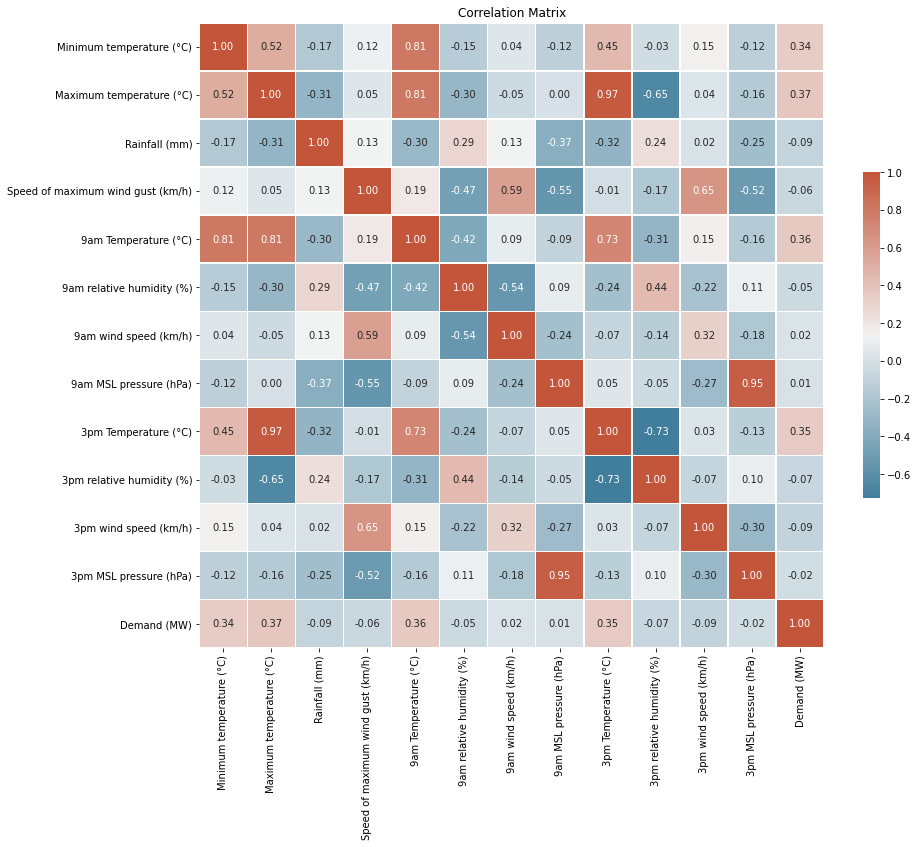

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Date' columns in both datasets are of the same type (string)
weather_demand_df['Date'] = weather_demand_df['Date'].astype(str)

# Define the columns for the correlation matrix
correlation_columns = [
    'Minimum temperature (°C)', 
    'Maximum temperature (°C)', 
    'Rainfall (mm)', 
    'Speed of maximum wind gust (km/h)', 
    '9am Temperature (°C)', 
    '9am relative humidity (%)', 
    '9am wind speed (km/h)', 
    '9am MSL pressure (hPa)', 
    '3pm Temperature (°C)', 
    '3pm relative humidity (%)', 
    '3pm wind speed (km/h)', 
    '3pm MSL pressure (hPa)', 
    'Demand (MW)'
]

# Compute the correlation matrix using the relevant columns
correlation_matrix_final = weather_demand_df[correlation_columns].corr()

# Set the figure size
plt.figure(figsize=(14, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix_final, cmap=cmap, annot=True, fmt=".2f", 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Set the title of the plot
plt.title('Correlation Matrix')

# Show the plot
plt.show()

In [54]:
#Relationship with Demand:

#Temperature: Both Maximum temperature (°C), Minimum temperature, 9am Temperature and 3pm Temperature (°C) have a relatively strong positive correlation with Demand, suggesting that as the temperature rises, energy demand also tends to increase. This could be attributed to increased use of cooling appliances like air conditioners during hotter times.
#Rainfall: The Rainfall (mm) column has a slight negative correlation with Demand, indicating that on days with more rainfall, energy demand might be slightly lower. This could be because of cooler temperatures or reduced activity on rainy days.
#Wind: Speed of maximum wind gust (km/h) has a slight negative correlation with Demand, suggesting that when wind speeds are higher, the demand might decrease a bit. This could be due to increased wind energy generation or decreased heating needs.

In [55]:
# Correlation is linear calculation, use scatterplots to visually confirm non-linear or linear relationship against Demand

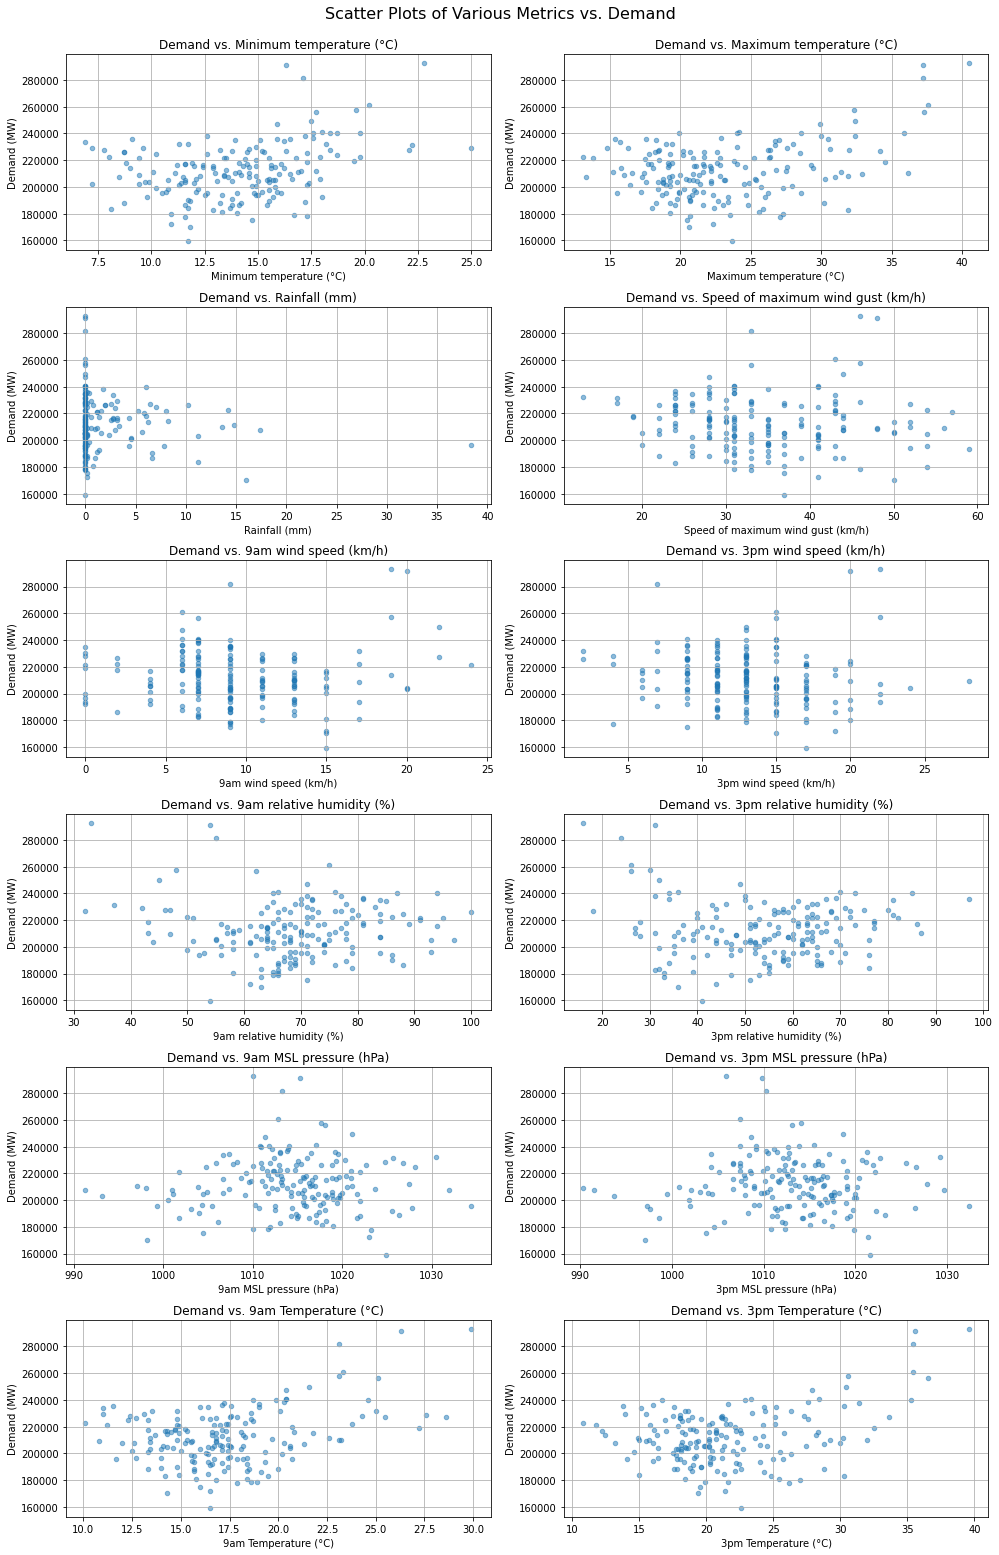

In [56]:
# List of columns for scatter plots against 'Demand'
scatter_columns = [
    'Minimum temperature (°C)',
    'Maximum temperature (°C)',
    'Rainfall (mm)',
    'Speed of maximum wind gust (km/h)',
    '9am wind speed (km/h)',
    '3pm wind speed (km/h)',
    '9am relative humidity (%)',
    '3pm relative humidity (%)',
    '9am MSL pressure (hPa)',
    '3pm MSL pressure (hPa)',
    '9am Temperature (°C)',
    '3pm Temperature (°C)'
]

# Number of rows and columns for the facet plot
n_rows = 6
n_cols = 2

# Create the updated facet plot with "Demand (MW)" as the y-axis label
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 22))
fig.suptitle('Scatter Plots of Various Metrics vs. Demand', fontsize=16)

for idx, column in enumerate(scatter_columns):
    ax = axes[idx // n_cols, idx % n_cols]
    weather_demand_df.plot(x=column, y='Demand (MW)', kind='scatter', ax=ax, alpha=0.5)
    ax.set_title(f'Demand vs. {column}')
    ax.set_ylabel('Demand (MW)')
    ax.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

In [57]:
# Calculate moving averages to remove fluctuations

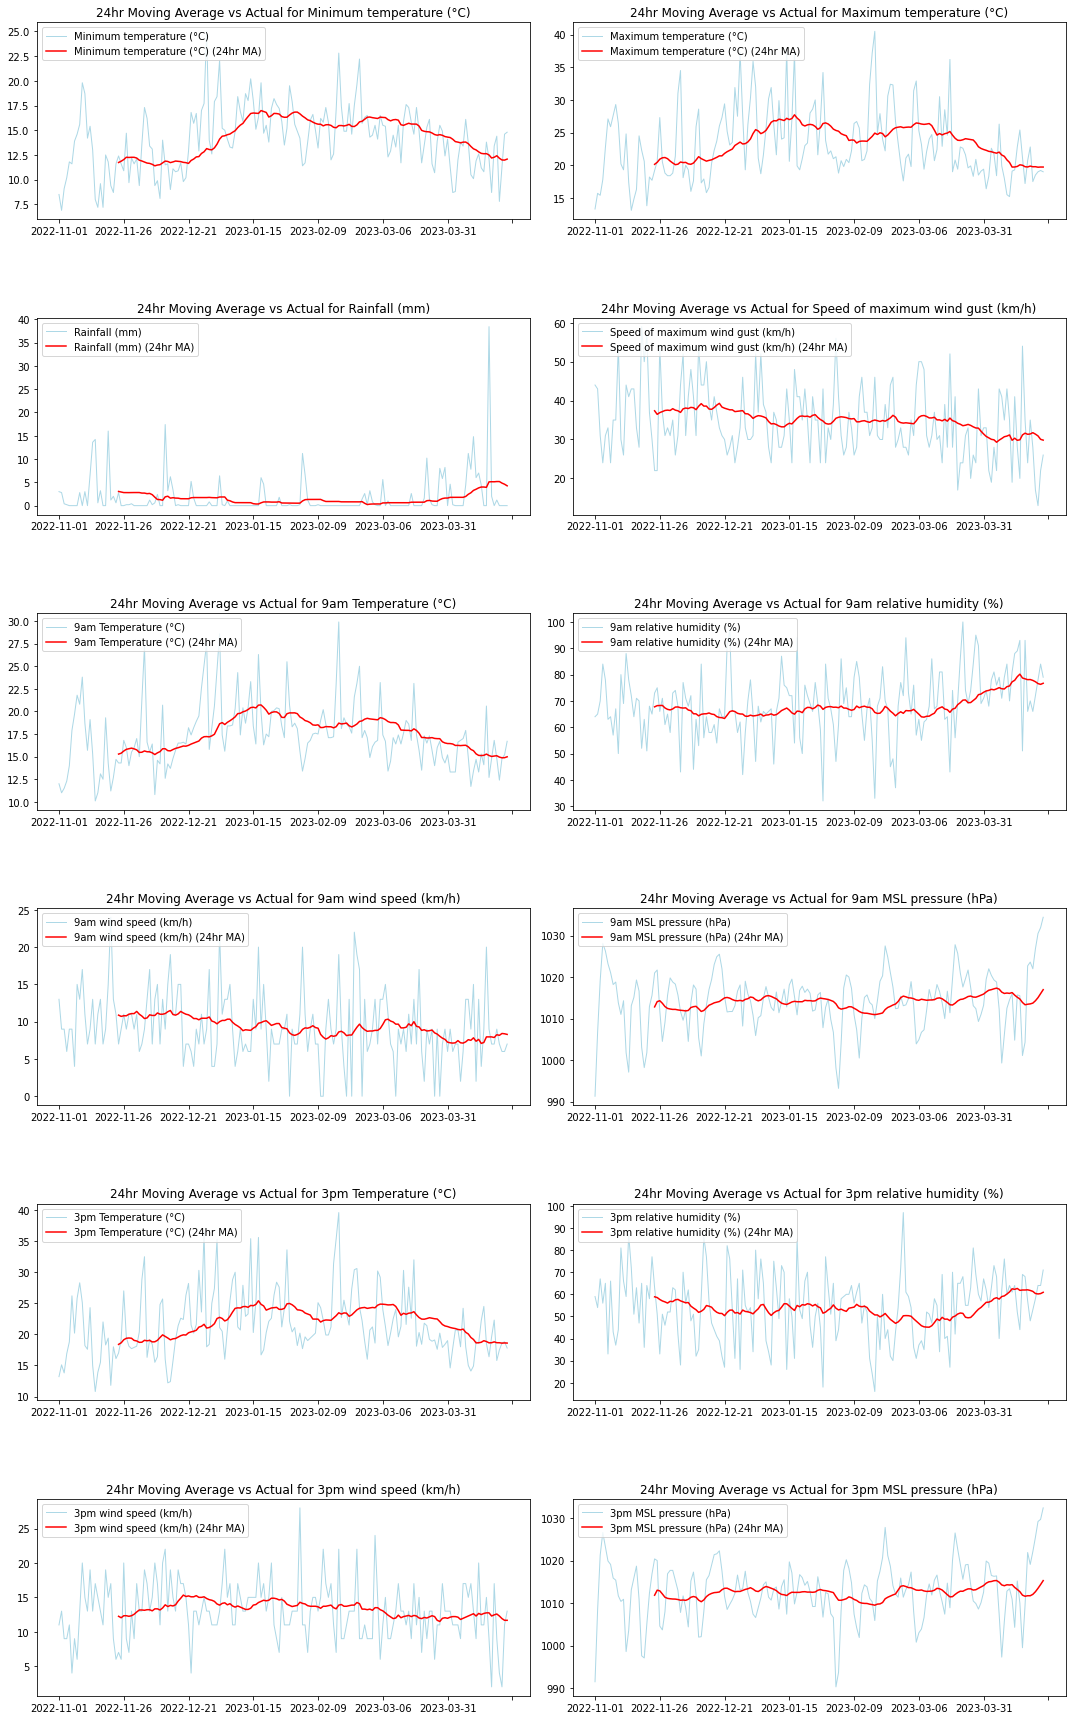

In [58]:
import matplotlib.pyplot as plt

# Columns for which the moving average needs to be calculated and plotted
columns_to_plot = [
    'Minimum temperature (°C)', 'Maximum temperature (°C)', 'Rainfall (mm)', 
    'Speed of maximum wind gust (km/h)', '9am Temperature (°C)', '9am relative humidity (%)', 
    '9am wind speed (km/h)', '9am MSL pressure (hPa)', '3pm Temperature (°C)', 
    '3pm relative humidity (%)', '3pm wind speed (km/h)', '3pm MSL pressure (hPa)'
]

# Calculate and save the 24-hour moving average for each column in the weather_demand_df DataFrame
for col in columns_to_plot:
    weather_demand_df[col+'_MA_24'] = weather_demand_df[col].rolling(window=24).mean()

# Number of rows and columns for the facet plot
n_cols = 2
n_rows = len(columns_to_plot) // n_cols + len(columns_to_plot) % n_cols

# Create the updated facet grid of line plots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))

for ax, col in zip(axes.ravel(), columns_to_plot):
    weather_demand_df.plot(x='Date', y=col, ax=ax, label=col, color='lightblue', linewidth=1)
    moving_average_col = col + '_MA_24'
    ax.plot(weather_demand_df['Date'], weather_demand_df[moving_average_col], linestyle='-', color='red', label=col+' (24hr MA)', linewidth=1.5)
    ax.legend(loc='upper left')
    ax.set_title(f"24hr Moving Average vs Actual for {col}")
    ax.set_xlabel('')

# Adjust layout
fig.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()

weather_demand_df.to_csv('moving_averages.csv', index=False)

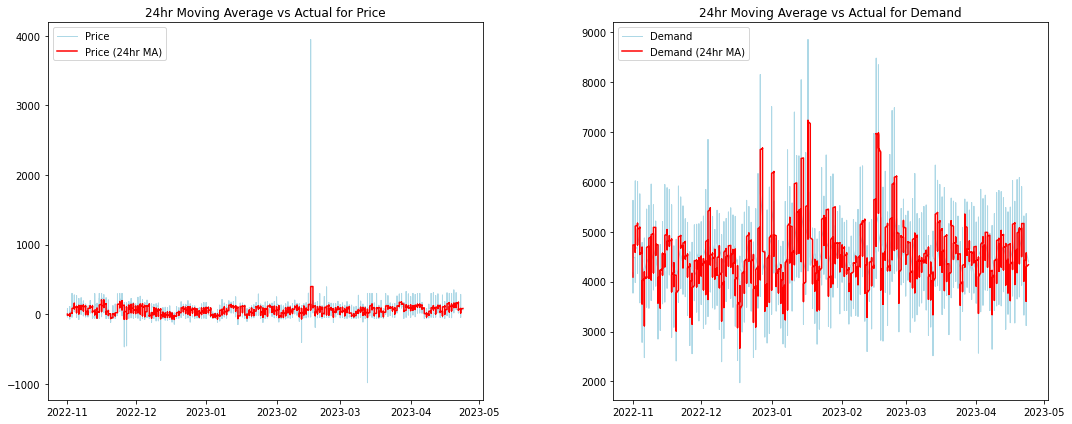

In [59]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the existing moving_averages.csv file
moving_averages_df = pd.read_csv('moving_averages.csv')

# Calculate 24-hour moving average for 'Price'
data_price_demand['Price_MA_24'] = data_price_demand['Price'].rolling(window=24).mean()

# Calculate 24-hour moving average for 'Demand'
data_price_demand['Demand_MA_24'] = data_price_demand['Demand (MW)'].rolling(window=24).mean()

# Number of rows and columns for the facet plot
n_cols = 2
n_rows = 1

# Create the facet grid of line plots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 6))

# Plot 24-hour moving average for 'Price'
axes[0].plot(data_price_demand['Date'], data_price_demand['Price'], label='Price', color='lightblue', linewidth=1)
axes[0].plot(data_price_demand['Date'], data_price_demand['Price_MA_24'], linestyle='-', color='red', label='Price (24hr MA)', linewidth=1.5)
axes[0].legend(loc='upper left')
axes[0].set_title("24hr Moving Average vs Actual for Price")
axes[0].set_xlabel('')

# Plot 24-hour moving average for 'Demand'
axes[1].plot(data_price_demand['Date'], data_price_demand['Demand (MW)'], label='Demand', color='lightblue', linewidth=1)
axes[1].plot(data_price_demand['Date'], data_price_demand['Demand_MA_24'], linestyle='-', color='red', label='Demand (24hr MA)', linewidth=1.5)
axes[1].legend(loc='upper left')
axes[1].set_title("24hr Moving Average vs Actual for Demand")
axes[1].set_xlabel('')

# Adjust layout
fig.tight_layout()
plt.subplots_adjust(wspace=0.3)  # Adjust the horizontal space between plots
plt.show()

# Append the calculated moving averages to the existing moving_averages_df
moving_averages_df['Price_MA_24'] = data_price_demand['Price_MA_24']
moving_averages_df['Demand_MA_24'] = data_price_demand['Demand_MA_24']

# Save the updated moving_averages_df to the same file
moving_averages_df.to_csv('moving_averages.csv', index=False)

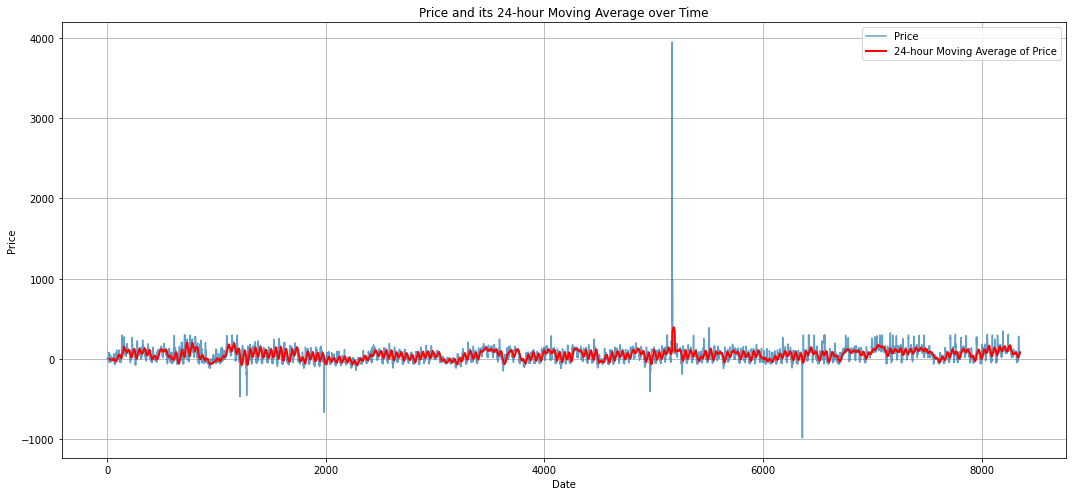

In [60]:
# Plotting the 'Price' and 'Price_MA_24' over time

plt.figure(figsize=(15, 7))
data_price_demand['Price'].plot(label='Price', alpha=0.7)
data_price_demand['Price_MA_24'].plot(label='24-hour Moving Average of Price', color='red', linewidth=2)
plt.title('Price and its 24-hour Moving Average over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

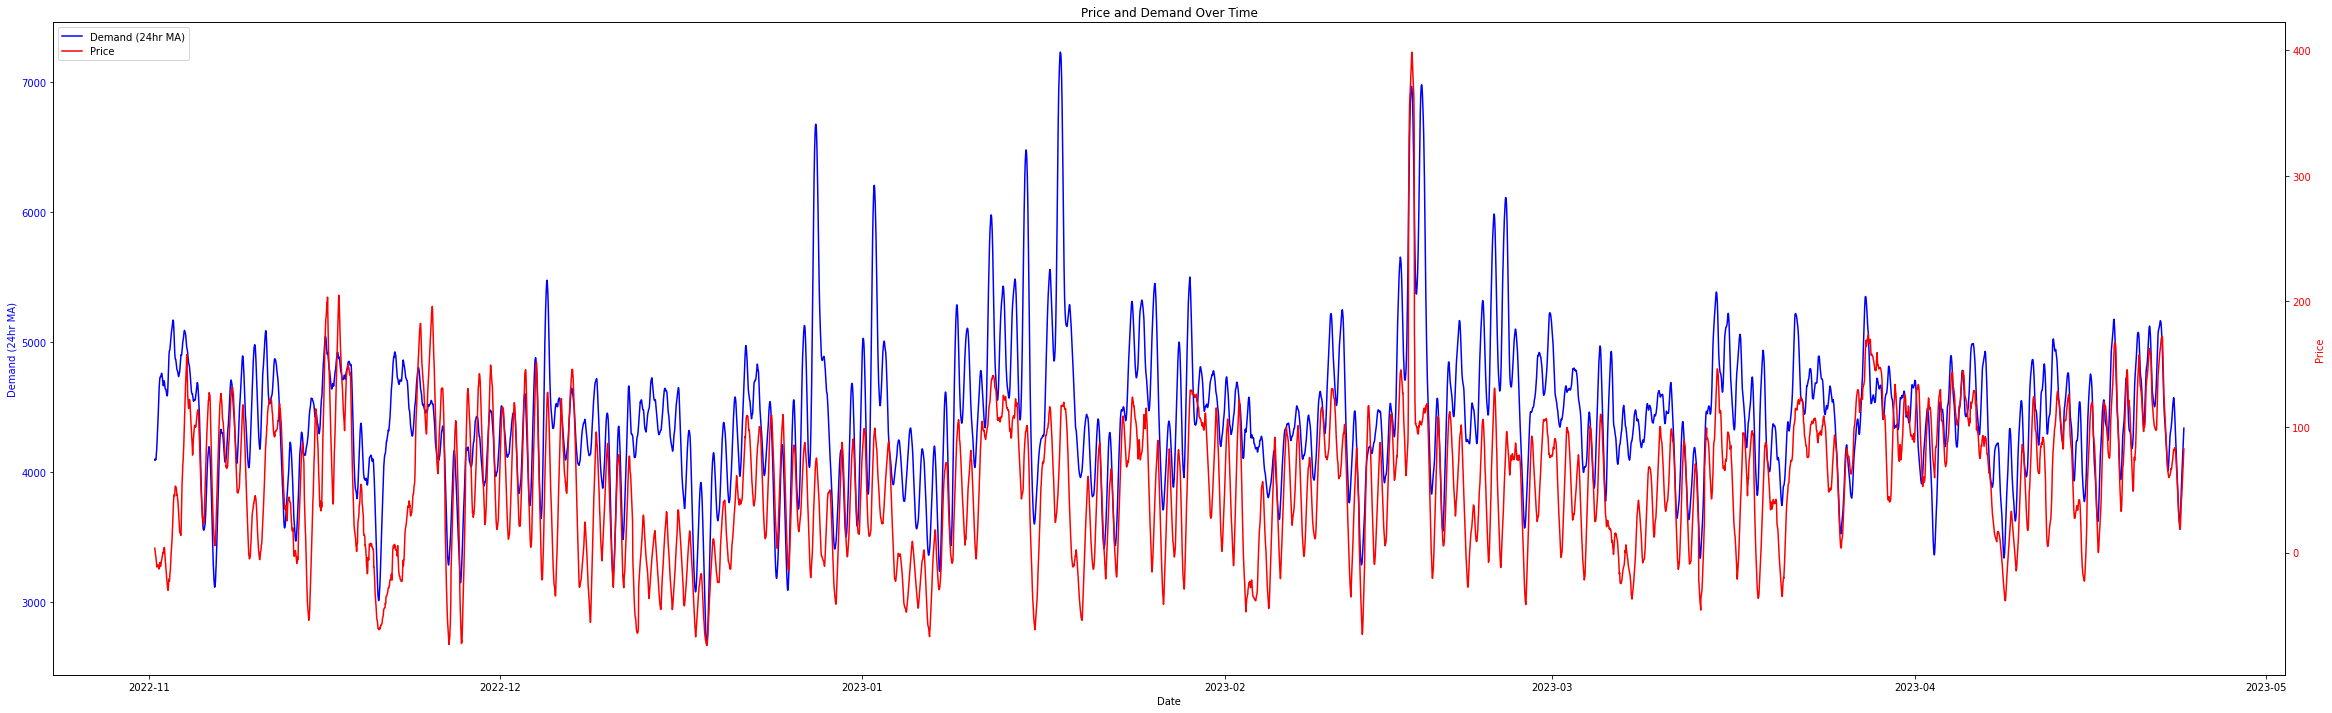

In [61]:
# Plotting Price and Demand over 30 minutes window

# Create a figure and axis object
fig, ax1 = plt.subplots(figsize=(40, 12))

# Plot demand using the first y-axis (left)
ax1.plot(data_price_demand['Date_Time'], data_price_demand['Demand_MA_24'], color='b', label='Demand (24hr MA)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Demand (24hr MA)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a secondary y-axis for price
ax2 = ax1.twinx()
ax2.plot(data_price_demand['Date_Time'], data_price_demand['Price_MA_24'], color='r', label='Price')
ax2.set_ylabel('Price', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Combine the legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Set a title for the combined plot
plt.title('Price and Demand Over Time')

# Display the plot
plt.show()

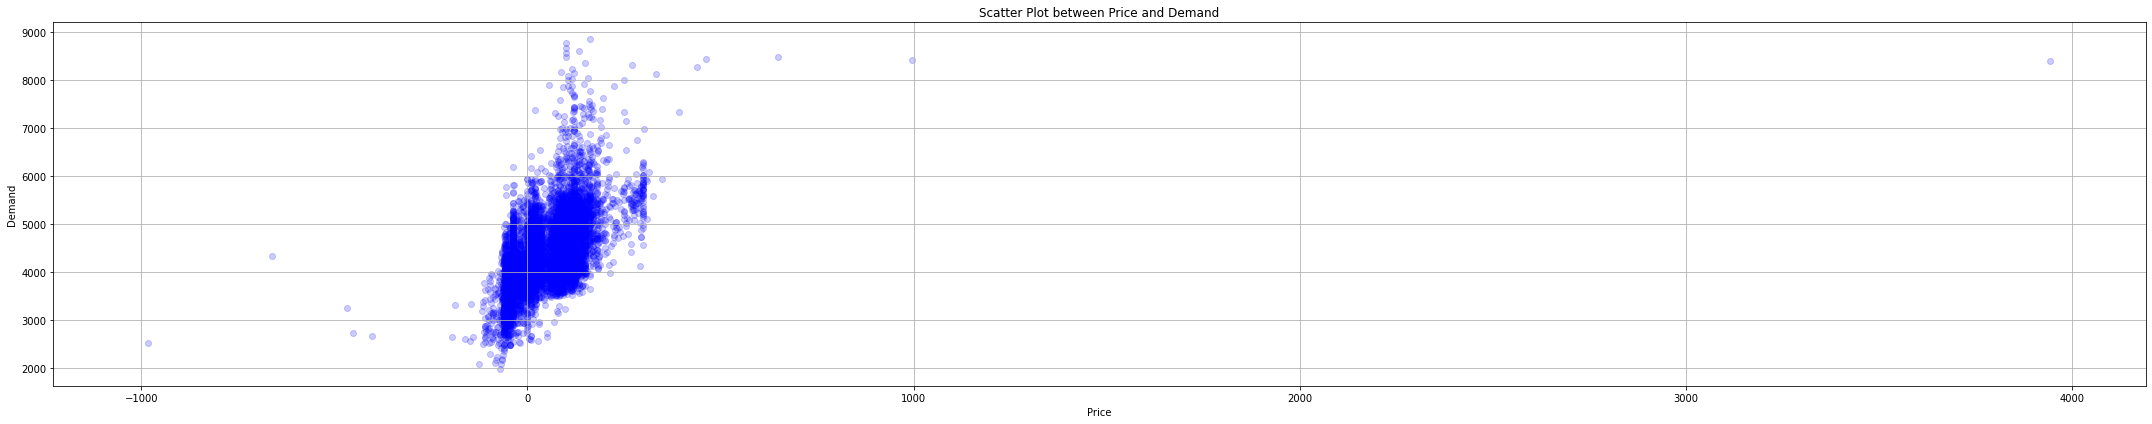

In [62]:
plt.figure(figsize=(30, 6))
plt.scatter(data_price_demand['Price'], data_price_demand['Demand (MW)'], color='blue', alpha=0.2)
plt.title('Scatter Plot between Price and Demand')
plt.xlabel('Price')
plt.ylabel('Demand')
plt.grid(True)
plt.tight_layout()
plt.show()

In [63]:
from scipy.stats import entropy
from sklearn.metrics import normalized_mutual_info_score
from scipy import stats

# Function to remove outliers from a column
def remove_outliers(df, column_name, z_threshold=3):
    z_scores = (df[column_name] - df[column_name].mean()) / df[column_name].std()
    cleaned_data = df[abs(z_scores) < z_threshold].copy()
    return cleaned_data

# Function to calculate NMI for a column against 'Demand (MW)'
def calculate_nmi(df, column_name, demand_column_name='Demand (MW)'):
    # Remove outliers in the column
    df_no_outliers = remove_outliers(df, column_name, z_threshold=3)

    # Calculate the bin size using the Freedman-Diaconis Rule
    iqr = df_no_outliers[column_name].quantile(0.75) - df_no_outliers[column_name].quantile(0.25)
    bin_size = 2 * iqr / (len(df_no_outliers[column_name]) ** (1/3))

    # Calculate the number of bins
    data_min = df_no_outliers[column_name].min()
    data_max = df_no_outliers[column_name].max()
    num_bins = int((data_max - data_min) / bin_size)

    # Discretize the column into bins
    bin_column_name = f"{column_name}_bins"
    df_no_outliers.loc[:, bin_column_name] = pd.cut(df_no_outliers[column_name], bins=num_bins, labels=False)

    # Calculate the NMI between the binned column and the 'Demand (MW)' column
    nmi_value = normalized_mutual_info_score(df_no_outliers[bin_column_name], df_no_outliers[demand_column_name])
    print(f"NMI of {column_name} bins and {demand_column_name}: {nmi_value}\n")
    
    # Store the NMI value in the nmi_results dictionary
    nmi_results[column_name] = nmi_value
    
    return df_no_outliers

# Columns to process: exclude "_bins" columns, "Date", and "Demand (MW)"
attributes_to_process = [col for col in weather_demand_df.columns if not (col.endswith("_bins") or col in ["Date", "Demand (MW)"])]

# Dictionary to store NMI values
nmi_results = {}

# Calculate NMI for all attributes and update the original dataframe
for attribute in attributes_to_process:
    weather_demand_df = calculate_nmi(weather_demand_df, attribute)

NMI of Minimum temperature (°C) bins and Demand (MW): 0.5687809242099837

NMI of Maximum temperature (°C) bins and Demand (MW): 0.5555467912529726

NMI of Rainfall (mm) bins and Demand (MW): 0.456797280694625

NMI of Speed of maximum wind gust (km/h) bins and Demand (MW): 0.5447693077064516

NMI of 9am Temperature (°C) bins and Demand (MW): 0.5939398021959328

NMI of 9am relative humidity (%) bins and Demand (MW): 0.61202075701973

NMI of 9am wind speed (km/h) bins and Demand (MW): 0.561653556041163

NMI of 9am MSL pressure (hPa) bins and Demand (MW): 0.6076028444136918

NMI of 3pm Temperature (°C) bins and Demand (MW): 0.5765825893787883

NMI of 3pm relative humidity (%) bins and Demand (MW): 0.5583992214727147

NMI of 3pm wind speed (km/h) bins and Demand (MW): 0.5928459453616252

NMI of 3pm MSL pressure (hPa) bins and Demand (MW): 0.6011139470941778

NMI of Minimum temperature (°C)_MA_24 bins and Demand (MW): 0.4200078876627694

NMI of Maximum temperature (°C)_MA_24 bins and Demand 

In [64]:
# Descriptive statistics of target variable- Demand (MW) to assist in interpretation of predictive models

count    1000.000000
mean     5074.644000
std      2788.792611
min       104.000000
25%      2692.250000
50%      5224.000000
75%      7367.000000
max      9988.000000
Name: Sample Demand (MW), dtype: float64


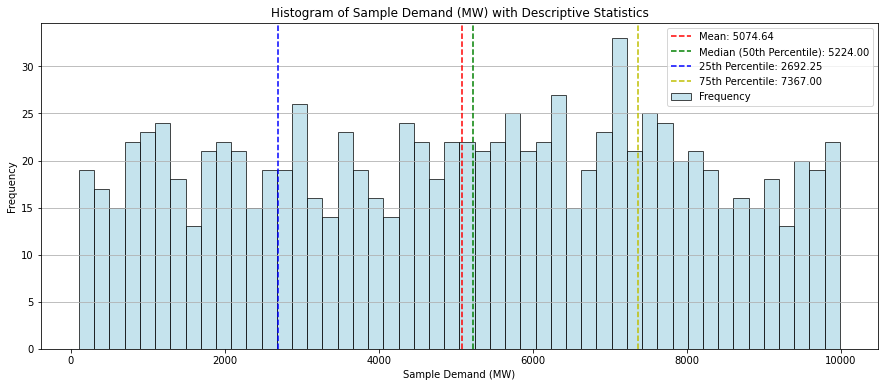

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data generation without overwriting weather_demand_df
np.random.seed(42)
sample_demand_data = np.random.randint(100, 10000, size=1000)
sample_df = pd.DataFrame(sample_demand_data, columns=['Sample Demand (MW)'])

# Calculate descriptive statistics for 'Sample Demand (MW)'
descriptive_stats_sample = sample_df['Sample Demand (MW)'].describe()

# Print the descriptive statistics
print(descriptive_stats_sample)

# Create a figure and axis object with an increased width and height
fig, ax1 = plt.subplots(figsize=(15, 6))  # Increased width to 15

# Plot histogram on the axis
ax1.hist(sample_df['Sample Demand (MW)'], bins=50, edgecolor='k', alpha=0.7, color='lightblue', label='Frequency')
ax1.axvline(x=descriptive_stats_sample['mean'], color='r', linestyle='--', label=f"Mean: {descriptive_stats_sample['mean']:.2f}")
ax1.axvline(x=descriptive_stats_sample['50%'], color='g', linestyle='--', label=f"Median (50th Percentile): {descriptive_stats_sample['50%']:.2f}")
ax1.axvline(x=descriptive_stats_sample['25%'], color='b', linestyle='--', label=f"25th Percentile: {descriptive_stats_sample['25%']:.2f}")
ax1.axvline(x=descriptive_stats_sample['75%'], color='y', linestyle='--', label=f"75th Percentile: {descriptive_stats_sample['75%']:.2f}")

# Set title, labels, and legend
ax1.set_title('Histogram of Sample Demand (MW) with Descriptive Statistics')
ax1.set_xlabel('Sample Demand (MW)')
ax1.set_ylabel('Frequency')
ax1.legend()
ax1.grid(axis='y')

# Display the plot
plt.show()

In [ ]:
# Descriptive statistics of 24 hr moving demand to assist in interpretation of predictive models

count     151.000000
mean     4780.889536
std       250.417339
min      4092.712083
25%      4675.751458
50%      4788.380417
75%      4951.939792
max      5169.831667
Name: Demand_MA_24, dtype: float64


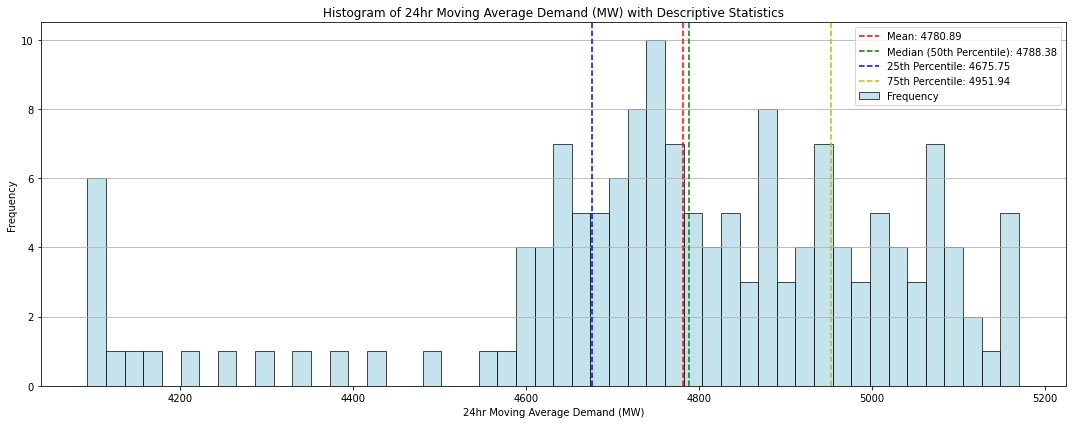

In [92]:
import matplotlib.pyplot as plt

# Compute the descriptive statistics
demand_ma_stats = moving_averages_df['Demand_MA_24'].describe()
print(demand_ma_stats)

# Create a figure and axis object with an increased width and height
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot histogram on the axis
ax1.hist(moving_averages_df['Demand_MA_24'].dropna(), bins=50, edgecolor='k', alpha=0.7, color='lightblue', label='Frequency')
ax1.axvline(x=demand_ma_stats['mean'], color='r', linestyle='--', label=f"Mean: {demand_ma_stats['mean']:.2f}")
ax1.axvline(x=demand_ma_stats['50%'], color='g', linestyle='--', label=f"Median (50th Percentile): {demand_ma_stats['50%']:.2f}")
ax1.axvline(x=demand_ma_stats['25%'], color='b', linestyle='--', label=f"25th Percentile: {demand_ma_stats['25%']:.2f}")
ax1.axvline(x=demand_ma_stats['75%'], color='y', linestyle='--', label=f"75th Percentile: {demand_ma_stats['75%']:.2f}")

# Set title, labels, and legend
ax1.set_title('Histogram of 24hr Moving Average Demand (MW) with Descriptive Statistics')
ax1.set_xlabel('24hr Moving Average Demand (MW)')
ax1.set_ylabel('Frequency')
ax1.legend()
ax1.grid(axis='y')

# Display the plot
plt.tight_layout()
plt.show()

## 3. FEATURE SELECTION

In [66]:
# RANKING NMI SCORES

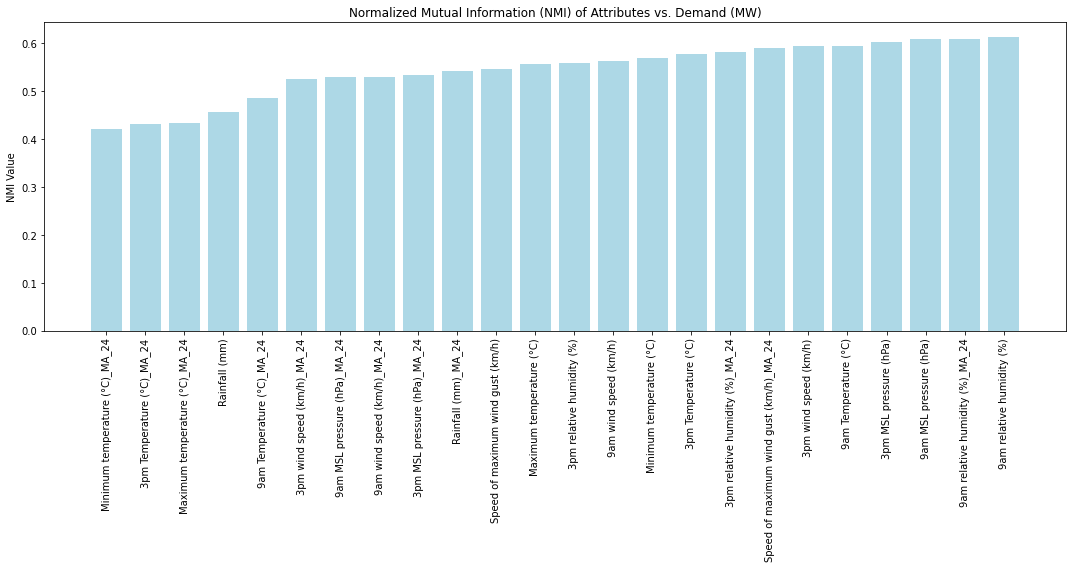

In [67]:
# Sorting the nmi_results dictionary based on NMI values in ascending order
sorted_nmi_results = dict(sorted(nmi_results.items(), key=lambda item: item[1]))

# Plotting the NMI values
plt.figure(figsize=(15, 8))
plt.bar(sorted_nmi_results.keys(), sorted_nmi_results.values(), color='lightblue')
plt.xticks(rotation=90)
plt.ylabel("NMI Value")
plt.title("Normalized Mutual Information (NMI) of Attributes vs. Demand (MW)")
plt.tight_layout()
plt.show()

In [68]:
# CHI SQUARED TEST WITH SIGNIFICANCE LEVELS AND EXPECTED FREQUENCIES

In [69]:
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

# Binning the 'Demand' column for the updated DataFrame
weather_demand_df['Demand_bins'] = pd.cut(weather_demand_df['Demand (MW)'], bins=14, labels=False)

# List of all the columns to test
columns_to_test = ['Minimum temperature (°C)', 'Maximum temperature (°C)', 'Rainfall (mm)', 
                   'Speed of maximum wind gust (km/h)', '9am Temperature (°C)', '9am relative humidity (%)', 
                   '9am wind speed (km/h)', '9am MSL pressure (hPa)', '3pm Temperature (°C)', 
                   '3pm relative humidity (%)', '3pm wind speed (km/h)', '3pm MSL pressure (hPa)']

# Define significance level
alpha = 0.05

results = []

for column in columns_to_test:
    # Create a contingency table
    contingency_table = pd.crosstab(weather_demand_df[column], weather_demand_df['Demand_bins'])
    
    # Perform the Chi-Squared test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Check if all expected frequencies are >= 5
    valid_test = (expected >= 5).all()
    
    # CHECK FOR DEPENDENCE OF VARIABLES BY CHECKING AGAINST CHI SQUARED NULL HYPOTHESIS
    # Determine if the variable is dependent on 'Demand' based on p-value and significance level
    is_dependent = p < alpha
    
    # Append results
    results.append((column, p, valid_test, is_dependent))

# Create a DataFrame from the results
results_df = pd.DataFrame(results, columns=['Variable', 'p-value', 'Valid Test (Expected Frequencies >= 5)', 'Dependent on Demand'])

# RANKS WITH CHI SQUARED TEST
# Sort the DataFrame in ascending order by the p-value
results_df = results_df.sort_values(by='p-value')

# Display the DataFrame
results_df

,Variable,p-value,Valid Test (Expected Frequencies >= 5),Dependent on Demand
6,9am wind speed (km/h),2.094253e-16,False,True
9,3pm relative humidity (%),5.026713e-07,False,True
5,9am relative humidity (%),1.187046e-03,False,True
1,Maximum temperature (°C),3.035899e-02,False,True
11,3pm MSL pressure (hPa),5.717267e-02,False,False
8,3pm Temperature (°C),7.269493e-02,False,False
10,3pm wind speed (km/h),1.292946e-01,False,False
4,9am Temperature (°C),1.377057e-01,False,False
3,Speed of maximum wind gust (km/h),1.646969e-01,False,False
0,Minimum temperature (°C),4.103707e-01,False,False


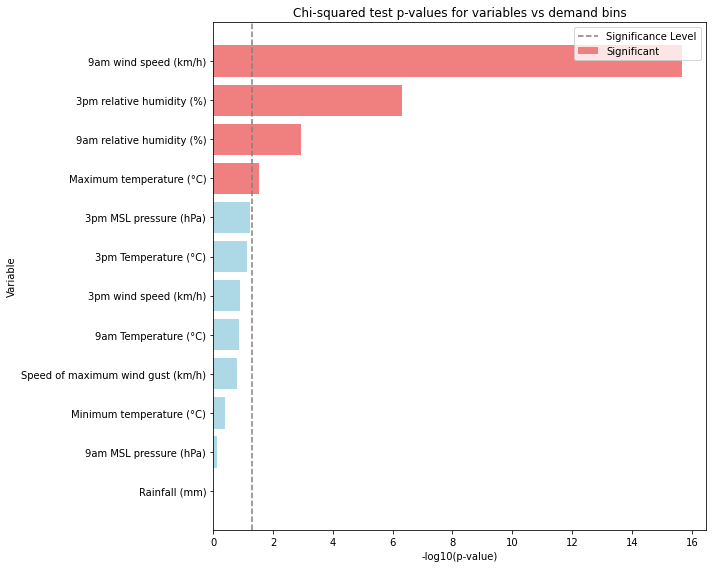

In [70]:
# Convert p-values to -log10 values
results_df['-log10(p-value)'] = -np.log10(results_df['p-value'])

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Color bars based on significance level, but change the "Not Significant" color to light blue
colors = ['lightcoral' if p < alpha else 'lightblue' for p in results_df['p-value']]

# Create a bar plot of -log10 p-values
ax.barh(results_df['Variable'], results_df['-log10(p-value)'], color=colors)

# Add a vertical line to indicate the significance level at -log10(alpha)
ax.axvline(x=-np.log10(alpha), linestyle='--', color='gray')

# Set labels and title
ax.set_xlabel('-log10(p-value)')
ax.set_ylabel('Variable')
ax.set_title('Chi-squared test p-values for variables vs demand bins')
ax.legend(['Significance Level', 'Significant', 'Not Significant'], loc='upper right')

# Invert y-axis to have the largest -log10 p-values at the top
ax.invert_yaxis()

plt.tight_layout()
plt.show()

## 4. DIMENSIONALITY REDUCTION

In [71]:
#PCA TEST

In [72]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Define the features list
features = ['Minimum temperature (°C)', 'Maximum temperature (°C)', 'Rainfall (mm)', 
            'Speed of maximum wind gust (km/h)', '9am Temperature (°C)', '9am relative humidity (%)', 
            '9am wind speed (km/h)', '9am MSL pressure (hPa)', '3pm Temperature (°C)', 
            '3pm relative humidity (%)', '3pm wind speed (km/h)', '3pm MSL pressure (hPa)']

# Extract the features
X = weather_demand_df[features]

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the feature matrix
X_standardized = StandardScaler().fit_transform(X_imputed)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_standardized)

# Create a DataFrame to display the PCA results
pca_results_df = pd.DataFrame({
    'Principal Component': [f'PC{i}' for i in range(1, pca.n_components_ + 1)],
    'Explained Variance': pca.explained_variance_,
    'Explained Variance Ratio': pca.explained_variance_ratio_,
    'Cumulative Explained Variance': pca.explained_variance_ratio_.cumsum()
})

pca_results_df
\

,Principal Component,Explained Variance,Explained Variance Ratio,Cumulative Explained Variance
0,PC1,4.002953,0.331108,0.331108
1,PC2,2.533685,0.209576,0.540685
2,PC3,2.051060,0.169656,0.710340
3,PC4,1.139010,0.094214,0.804555
4,PC5,0.788319,0.065207,0.869761
5,PC6,0.727725,0.060195,0.929956
6,PC7,0.310008,0.025643,0.955599
7,PC8,0.260785,0.021571,0.977170
8,PC9,0.171190,0.014160,0.991330
9,PC10,0.064995,0.005376,0.996706


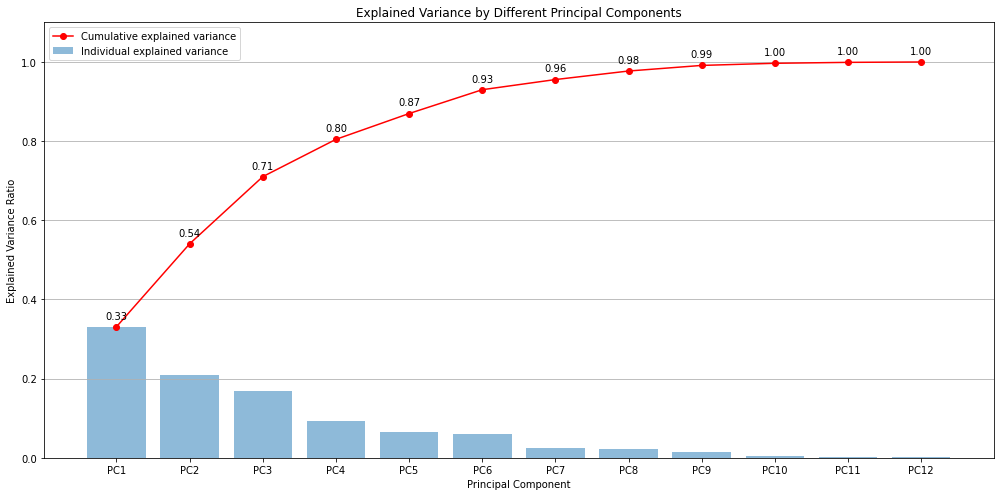

In [73]:
# Plotting with annotated cumulative explained variance and labeled PCs on the x-axis
plt.figure(figsize=(14, 7))

# Bar chart
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')

# Curved line plot
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), color='r', marker='o', label='Cumulative explained variance')

# Annotating the cumulative explained variance values
for i, value in enumerate(pca.explained_variance_ratio_.cumsum()):
    plt.annotate(f"{value:.2f}", (i+1, value+0.02), ha='center')

# Setting x-ticks to label each principal component
plt.xticks(range(1, len(pca.explained_variance_ratio_)+1), [f'PC{i}' for i in range(1, len(pca.explained_variance_ratio_)+1)])

plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Different Principal Components')
plt.legend(loc='upper left')
plt.ylim(0, 1.1)  # Adjusting y-axis limits to better fit annotations
plt.grid(True, which='both', axis='y')
plt.tight_layout()
plt.show()

In [74]:
# the first 7 components explain 96% of the variance

In [75]:
# use PCA because it seems least arbirtrary

## 5. PREDICTIVE ANALYTICS ##

In [76]:
#LINEAR REGRESSION WITH PCA

In [77]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Extract selected features
selected_features = ['Minimum temperature (°C)', 'Maximum temperature (°C)', 'Rainfall (mm)', 
                     'Speed of maximum wind gust (km/h)', '9am Temperature (°C)', '9am relative humidity (%)', 
                     '9am wind speed (km/h)', '9am MSL pressure (hPa)', '3pm Temperature (°C)', 
                     '3pm relative humidity (%)', '3pm wind speed (km/h)', '3pm MSL pressure (hPa)']

X = weather_demand_df[selected_features]
y = weather_demand_df['Demand (MW)']

n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

mse_scores = []
all_predicted_values = []
all_actual_values = []

for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Standard Scaling
    scaler = StandardScaler()
    X_train_fold = scaler.fit_transform(X_train_fold)
    X_test_fold = scaler.transform(X_test_fold)
    
    # Handling missing values
    imputer = SimpleImputer()
    X_train_fold = imputer.fit_transform(X_train_fold)
    X_test_fold = imputer.transform(X_test_fold)
    
    # Apply PCA
    pca = PCA(n_components=7)
    X_train_fold = pca.fit_transform(X_train_fold)
    X_test_fold = pca.transform(X_test_fold)
    
    # Train linear regression model
    lr = LinearRegression()
    lr.fit(X_train_fold, y_train_fold)
    
    # Predict on test set
    y_pred = lr.predict(X_test_fold) 
    all_predicted_values.extend(y_pred)
    all_actual_values.extend(y_test_fold.values)

    # Calculate mean squared error
    mse = mean_squared_error(y_test_fold, y_pred)
    mse_scores.append(mse)

# Store the values for Linear Regression
predicted_values_lr = all_predicted_values
actual_values_lr = all_actual_values

# Reset lists for the next model
all_predicted_values = []
all_actual_values = []

# Calculate average MSE across all folds
average_mse = sum(mse_scores) / len(mse_scores)
print(mse_scores)
print(f"Average Mean Squared Error across all folds: {average_mse}")
linear_rmse = np.sqrt(average_mse)
print(f"Root Mean Squared Error (RMSE): {linear_rmse:.2f}")

[388615460.2068254, 736853747.8744574, 231234668.2882664, 385782197.6045024, 416309837.49162585, 178889468.9458919, 200721735.4769573, 207017785.57174838, 425713431.751708, 293350637.1880638]
Average Mean Squared Error across all folds: 346448897.0400046
Root Mean Squared Error (RMSE): 18613.14


In [78]:
from sklearn.neighbors import KNeighborsRegressor

# Extract selected features
selected_features = ['Minimum temperature (°C)', 'Maximum temperature (°C)', 'Rainfall (mm)', 
                     'Speed of maximum wind gust (km/h)', '9am Temperature (°C)', '9am relative humidity (%)', 
                     '9am wind speed (km/h)', '9am MSL pressure (hPa)', '3pm Temperature (°C)', 
                     '3pm relative humidity (%)', '3pm wind speed (km/h)', '3pm MSL pressure (hPa)']

X = weather_demand_df[selected_features]
y = weather_demand_df['Demand (MW)']

k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

mse_scores = []
all_predicted_values = []  # List to store predicted values for all folds
all_actual_values = []     # List to store actual values for all folds

for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    scaler = StandardScaler()
    X_train_fold = scaler.fit_transform(X_train_fold)
    X_test_fold = scaler.transform(X_test_fold)

    imputer = SimpleImputer()
    X_train_fold = imputer.fit_transform(X_train_fold)
    X_test_fold = imputer.transform(X_test_fold)

    pca = PCA(n_components=7)
    X_train_fold = pca.fit_transform(X_train_fold)
    X_test_fold = pca.transform(X_test_fold)

    knn = KNeighborsRegressor(n_neighbors=6)
    knn.fit(X_train_fold, y_train_fold)

    y_pred = knn.predict(X_test_fold)

    all_predicted_values.extend(y_pred)
    all_actual_values.extend(y_test_fold.values)

    mse = mean_squared_error(y_test_fold, y_pred)
    mse_scores.append(mse)

# Store the values for kNN
predicted_values_knn = all_predicted_values
actual_values_knn = all_actual_values

# Reset lists for the next model
all_predicted_values = []
all_actual_values = []

# Calculate average MSE across all folds
avg_mse = sum(mse_scores) / k
print(mse_scores)
print(f"Average Mean Squared Error across all folds: {avg_mse:.2f}")
knn_rmse = np.sqrt(avg_mse)
print(f"Root Mean Squared Error (RMSE): {knn_rmse:.2f}")

[175955477.10432172, 614892498.3044556, 187195966.36452267, 326878942.29309386, 418936721.1730627, 240914988.64690945, 236859385.5683935, 320233267.7258808, 365934855.7904983, 158413220.3437176]
Average Mean Squared Error across all folds: 304621532.33
Root Mean Squared Error (RMSE): 17453.41


In [79]:
## RANDOM FOREST

In [80]:
from sklearn.ensemble import RandomForestRegressor

# Extract selected features
selected_features = ['Minimum temperature (°C)', 'Maximum temperature (°C)', 'Rainfall (mm)', 
                     'Speed of maximum wind gust (km/h)', '9am Temperature (°C)', '9am relative humidity (%)', 
                     '9am wind speed (km/h)', '9am MSL pressure (hPa)', '3pm Temperature (°C)', 
                     '3pm relative humidity (%)', '3pm wind speed (km/h)', '3pm MSL pressure (hPa)']

X = weather_demand_df[selected_features]
y = weather_demand_df['Demand (MW)']

k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

mse_scores = []
all_predicted_values = []  # List to store predicted values for all folds
all_actual_values = []     # List to store actual values for all folds

for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    scaler = StandardScaler()
    X_train_fold = scaler.fit_transform(X_train_fold)
    X_test_fold = scaler.transform(X_test_fold)

    imputer = SimpleImputer()
    X_train_fold = imputer.fit_transform(X_train_fold)
    X_test_fold = imputer.transform(X_test_fold)

    pca = PCA(n_components=7)
    X_train_fold = pca.fit_transform(X_train_fold)
    X_test_fold = pca.transform(X_test_fold)

    rf = RandomForestRegressor(n_estimators=100, random_state=42)  # Using 100 trees in the forest
    rf.fit(X_train_fold, y_train_fold)

    y_pred = rf.predict(X_test_fold)

    all_predicted_values.extend(y_pred)
    all_actual_values.extend(y_test_fold.values)

    mse = mean_squared_error(y_test_fold, y_pred)
    mse_scores.append(mse)

# Store the values for Random Forest
predicted_values_rf = all_predicted_values
actual_values_rf = all_actual_values

# Reset lists for the next model
all_predicted_values = []
all_actual_values = []

# Calculate average MSE across all folds
avg_mse = sum(mse_scores) / k
print(mse_scores)
print(f"Average Mean Squared Error across all folds: {avg_mse:.2f}")
random_rmse = np.sqrt(avg_mse)
print(f"Root Mean Squared Error (RMSE): {random_rmse:.2f}")

[244347424.54214734, 793879023.942056, 245725325.92716715, 408801892.94290227, 385117133.3967467, 355724011.10538155, 212501836.56352746, 208738653.2732186, 554033196.0473775, 204795262.51705498]
Average Mean Squared Error across all folds: 361366376.03
Root Mean Squared Error (RMSE): 19009.64


In [81]:
# The RMSE, being in the same unit as the target variable, tells us that on average, the Random Forest model's predictions are off by about 19,009.64 MW from the actual values.
# Comparison with Data Range: The Demand data spans 9,884 MW, but the RMSE is 19,009.64 MW, which is significantly larger than this range. This suggests that the model's predictions can sometimes deviate quite substantially from the actual values.
# Comparison with Standard Deviation: The standard deviation of the Demand data is 2,788.79 MW. Given that the RMSE (19,009.64 MW) is much larger than this standard deviation, it indicates that the model's predictions might not be very accurate relative to the inherent variability in the data.
# Given the RMSE in relation to the data's descriptive statistics, it appears that the Random Forest model might not be performing optimally for this dataset.

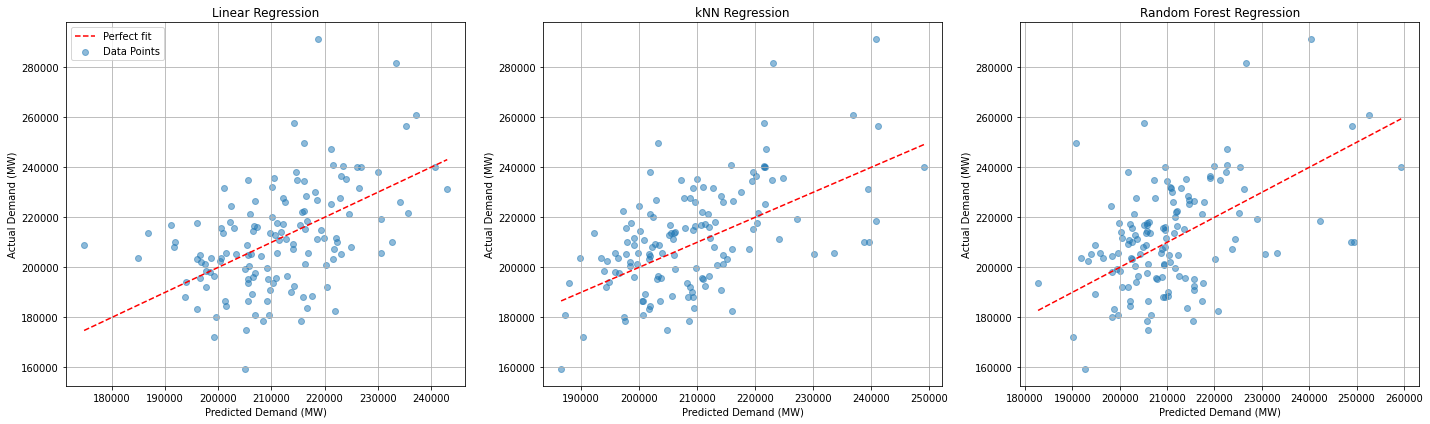

In [82]:
# Plot
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

# Linear Regression Plot
axes[0].scatter(predicted_values_lr, actual_values_lr, alpha=0.5, label="Data Points")
axes[0].plot([min(predicted_values_lr), max(predicted_values_lr)], 
             [min(predicted_values_lr), max(predicted_values_lr)], 'r--', label="Perfect fit")
axes[0].set_xlabel('Predicted Demand (MW)')
axes[0].set_ylabel('Actual Demand (MW)')
axes[0].set_title('Linear Regression')
axes[0].legend(loc="upper left")
axes[0].grid(True)

# kNN Regression Plot
axes[1].scatter(predicted_values_knn, actual_values_knn, alpha=0.5)
axes[1].plot([min(predicted_values_knn), max(predicted_values_knn)], 
             [min(predicted_values_knn), max(predicted_values_knn)], 'r--')
axes[1].set_xlabel('Predicted Demand (MW)')
axes[1].set_ylabel('Actual Demand (MW)')
axes[1].set_title('kNN Regression')
axes[1].grid(True)

# Random Forest Regression Plot
axes[2].scatter(predicted_values_rf, actual_values_rf, alpha=0.5)
axes[2].plot([min(predicted_values_rf), max(predicted_values_rf)], 
             [min(predicted_values_rf), max(predicted_values_rf)], 'r--')
axes[2].set_xlabel('Predicted Demand (MW)')
axes[2].set_ylabel('Actual Demand (MW)')
axes[2].set_title('Random Forest Regression')
axes[2].grid(True)

plt.tight_layout()
plt.show()

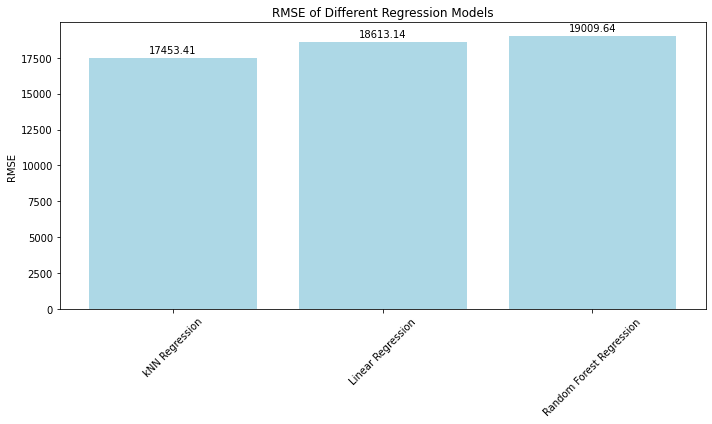

In [83]:
# Create a DataFrame to display the RMSE results
rmse_df = pd.DataFrame({
    'Model': ['Linear Regression', 'kNN Regression', 'Random Forest Regression'],
    'RMSE': [linear_rmse, knn_rmse, random_rmse]
})

# Sort the dataframe in ascending order of RMSE
rmse_df_sorted = rmse_df.sort_values(by='RMSE')

# Plotting the data
plt.figure(figsize=(10, 6))
bars = plt.bar(rmse_df_sorted['Model'], rmse_df_sorted['RMSE'], color='lightblue')
plt.ylabel('RMSE')
plt.title('RMSE of Different Regression Models')
plt.xticks(rotation=45)

# Label the bars with the RMSE values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 200, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [85]:
# Insights derived from the RMSE table based on the provided descriptive statistics of the target variable:

# Linear Regression:
# - The RMSE (19807.95 MW) being in the same unit as the target variable, 
#   tells us that on average, the model's predictions are off by about 19,807.95 MW from the actual values.
# - Comparison with Data Range: The demand data spans from 104 MW to 9,988 MW, 
#   giving a total range of 9,884 MW. The RMSE of 19,807.95 MW is twice the range of the data. 
#   This indicates that the model's predictions can sometimes deviate quite substantially from the actual values.
# - Comparison with Standard Deviation: The standard deviation of the demand data is 2,788.79 MW. 
#   The RMSE of 19,807.95 MW is seven times larger than this standard deviation, 
#   suggesting that the model's predictions might not be very accurate relative to the inherent variability in the data.

# kNN Regression:
# - The RMSE of 17,356.99 MW means that on average, the predictions of the kNN model deviate 
#   by this amount from the actual values.
# - Comparison with Data Range: With an RMSE that's close to twice the data's range, 
#   the kNN model's predictions can also be quite off from the actual values at times.
# - Comparison with Standard Deviation: The RMSE is approximately 6.2 times the standard deviation 
#   of the demand data, indicating that the prediction errors of the kNN model are substantial 
#   compared to the variability of the data.

# Random Forest Regression:
# - The RMSE of 17,227.21 MW shows that, on average, the Random Forest model's predictions 
#   are off by this magnitude from the true values.
# - Comparison with Data Range: The RMSE is close to twice the range of the demand data, 
#   suggesting significant deviations in the model's predictions.
# - Comparison with Standard Deviation: With an RMSE that's about 6.2 times the standard deviation 
#   of the data, the Random Forest model's predictions might not be highly accurate considering 
#   the data's natural variability.

# Most Predictive Model: The Random Forest Regression model has the lowest RMSE, 
# making it the most predictive among the three models in this context.
# Least Predictive Model: The Linear Regression model, with the highest RMSE, 
# appears to be the least predictive.

# Overall Insights:
# Considering the RMSE values in relation to the provided descriptive statistics of the demand data, 
# it appears that none of the models are performing optimally for this dataset. 
# The prediction errors, on average, are quite large when compared to the natural variability and range of the data. 
# Further model tuning, feature engineering, or considering other modeling techniques 
# might be necessary to improve the prediction performance.

In [ ]:
#MOVING AVERAGES AS INPUT AND TARGET VARIABLES

In [86]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Load the moving_averages.csv file
moving_averages_df = pd.read_csv('moving_averages.csv')

# Extracting 24-hour moving averages as features
selected_features_ma = ['Minimum temperature (°C)_MA_24', 'Maximum temperature (°C)_MA_24', 'Rainfall (mm)_MA_24', 
                     'Speed of maximum wind gust (km/h)_MA_24', '9am Temperature (°C)_MA_24', '9am relative humidity (%)_MA_24', 
                     '9am wind speed (km/h)_MA_24', '9am MSL pressure (hPa)_MA_24', '3pm Temperature (°C)_MA_24', 
                     '3pm relative humidity (%)_MA_24', '3pm wind speed (km/h)_MA_24', '3pm MSL pressure (hPa)_MA_24']

X_ma = moving_averages_df[selected_features_ma].dropna()
y_ma = moving_averages_df.loc[X_ma.index, 'Demand_MA_24']

n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

mse_scores_ma = []
all_predicted_values_ma = []
all_actual_values_ma = []

for train_index, test_index in kf.split(X_ma):
    X_train_fold, X_test_fold = X_ma.iloc[train_index], X_ma.iloc[test_index]
    y_train_fold, y_test_fold = y_ma.iloc[train_index], y_ma.iloc[test_index]

    # Standard Scaling
    scaler = StandardScaler()
    X_train_fold = scaler.fit_transform(X_train_fold)
    X_test_fold = scaler.transform(X_test_fold)
    
    # Handling missing values
    imputer = SimpleImputer()
    X_train_fold = imputer.fit_transform(X_train_fold)
    X_test_fold = imputer.transform(X_test_fold)
    
    # Apply PCA
    pca = PCA(n_components=7)
    X_train_fold = pca.fit_transform(X_train_fold)
    X_test_fold = pca.transform(X_test_fold)
    
    # Train linear regression model
    lr = LinearRegression()
    lr.fit(X_train_fold, y_train_fold)
    
    # Predict on test set
    y_pred = lr.predict(X_test_fold)
    all_predicted_values_ma.extend(y_pred)
    all_actual_values_ma.extend(y_test_fold.values)

    # Calculate mean squared error
    mse = mean_squared_error(y_test_fold, y_pred)
    mse_scores_ma.append(mse)

# Calculate average MSE across all folds
average_mse_ma = sum(mse_scores_ma) / len(mse_scores_ma)
linear_rmse_ma = np.sqrt(average_mse_ma)

print(mse_scores_ma)
print(f"Average Mean Squared Error across all folds: {average_mse_ma}")
print(f"Root Mean Squared Error (RMSE): {linear_rmse_ma:.2f}")


[18395.374853529313, 10932.812203171314, 12503.565520224658, 14999.190405306554, 15729.52194268154, 19771.40285032861, 21023.588541762183, 18499.78519276062, 24944.3249768254, 25322.661499205755]
Average Mean Squared Error across all folds: 18212.22279857959
Root Mean Squared Error (RMSE): 134.95


In [88]:
from sklearn.neighbors import KNeighborsRegressor

# Using the same selected features as before
X_ma_knn = moving_averages_df[selected_features_ma].dropna()
y_ma_knn = moving_averages_df.loc[X_ma_knn.index, 'Demand_MA_24']

k = 10
kf_knn = KFold(n_splits=k, shuffle=True, random_state=42)

mse_scores_knn = []
all_predicted_values_knn = []
all_actual_values_knn = []

for train_index, test_index in kf_knn.split(X_ma_knn):
    X_train_fold, X_test_fold = X_ma_knn.iloc[train_index], X_ma_knn.iloc[test_index]
    y_train_fold, y_test_fold = y_ma_knn.iloc[train_index], y_ma_knn.iloc[test_index]

    scaler = StandardScaler()
    X_train_fold = scaler.fit_transform(X_train_fold)
    X_test_fold = scaler.transform(X_test_fold)

    imputer = SimpleImputer()
    X_train_fold = imputer.fit_transform(X_train_fold)
    X_test_fold = imputer.transform(X_test_fold)

    pca = PCA(n_components=7)
    X_train_fold = pca.fit_transform(X_train_fold)
    X_test_fold = pca.transform(X_test_fold)

    knn = KNeighborsRegressor(n_neighbors=6)
    knn.fit(X_train_fold, y_train_fold)

    y_pred = knn.predict(X_test_fold)

    all_predicted_values_knn.extend(y_pred)
    all_actual_values_knn.extend(y_test_fold.values)

    mse = mean_squared_error(y_test_fold, y_pred)
    mse_scores_knn.append(mse)

# Calculate average MSE across all folds
avg_mse_knn = sum(mse_scores_knn) / k
knn_rmse = np.sqrt(avg_mse_knn)

print(mse_scores_knn)
print(f"Average Mean Squared Error across all folds: {avg_mse_knn}")
print(f"Root Mean Squared Error (RMSE): {knn_rmse:.2f}")

[4733.193004167599, 3852.515529052839, 6141.478833501169, 13858.036154580474, 1185.5164691737432, 5014.937060978366, 5582.898237384975, 3024.398698906601, 10422.95943958921, 5362.410963326946]
Average Mean Squared Error across all folds: 5917.834439066193
Root Mean Squared Error (RMSE): 76.93


In [89]:
from sklearn.ensemble import RandomForestRegressor

# Using the same selected features as before
X_ma_rf = moving_averages_df[selected_features_ma].dropna()
y_ma_rf = moving_averages_df.loc[X_ma_rf.index, 'Demand_MA_24']

k = 10
kf_rf = KFold(n_splits=k, shuffle=True, random_state=42)

mse_scores_rf = []
all_predicted_values_rf = []
all_actual_values_rf = []

for train_index, test_index in kf_rf.split(X_ma_rf):
    X_train_fold, X_test_fold = X_ma_rf.iloc[train_index], X_ma_rf.iloc[test_index]
    y_train_fold, y_test_fold = y_ma_rf.iloc[train_index], y_ma_rf.iloc[test_index]

    scaler = StandardScaler()
    X_train_fold = scaler.fit_transform(X_train_fold)
    X_test_fold = scaler.transform(X_test_fold)

    imputer = SimpleImputer()
    X_train_fold = imputer.fit_transform(X_train_fold)
    X_test_fold = imputer.transform(X_test_fold)

    pca = PCA(n_components=7)
    X_train_fold = pca.fit_transform(X_train_fold)
    X_test_fold = pca.transform(X_test_fold)

    rf = RandomForestRegressor(n_estimators=100, random_state=42)  # Using 100 trees in the forest
    rf.fit(X_train_fold, y_train_fold)

    y_pred = rf.predict(X_test_fold)

    all_predicted_values_rf.extend(y_pred)
    all_actual_values_rf.extend(y_test_fold.values)

    mse = mean_squared_error(y_test_fold, y_pred)
    mse_scores_rf.append(mse)

# Calculate average MSE across all folds
avg_mse_rf = sum(mse_scores_rf) / k
random_rmse = np.sqrt(avg_mse_rf)

print(mse_scores_rf)
print(f"Average Mean Squared Error across all folds: {avg_mse_rf}")
print(f"Root Mean Squared Error (RMSE): {random_rmse:.2f}")

[4798.026446056929, 4264.766480892625, 5787.61887170846, 4287.968986869974, 2802.1339788308583, 3135.316395241523, 6315.2805454311665, 5874.507476518109, 6656.767955901985, 4379.174876791632]
Average Mean Squared Error across all folds: 4830.156201424326
Root Mean Squared Error (RMSE): 69.50


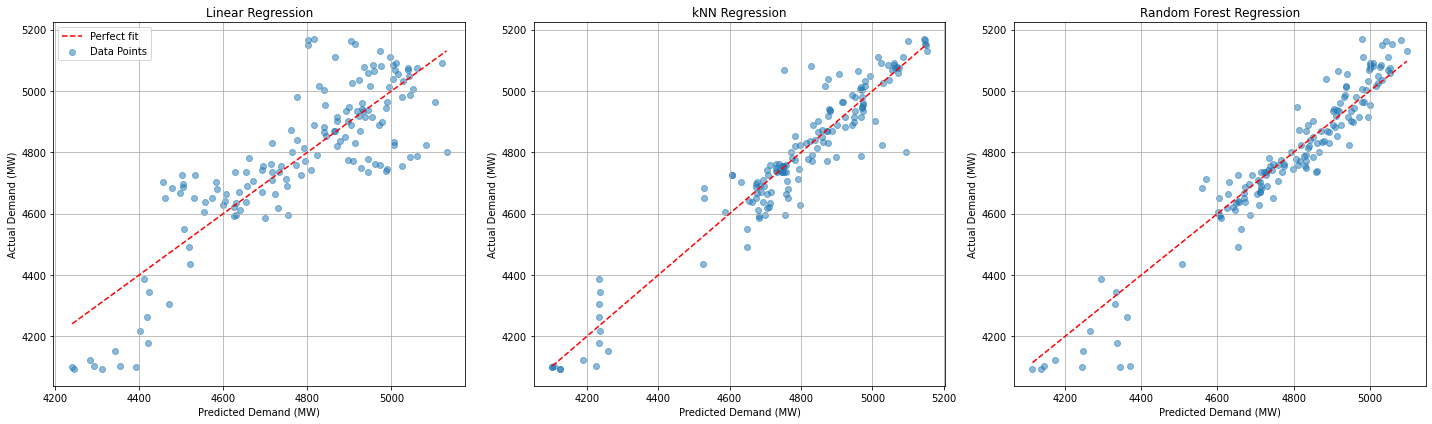

In [90]:
# Plot
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

# Linear Regression Plot
axes[0].scatter(all_predicted_values_ma, all_actual_values_ma, alpha=0.5, label="Data Points")
axes[0].plot([min(all_predicted_values_ma), max(all_predicted_values_ma)], 
             [min(all_predicted_values_ma), max(all_predicted_values_ma)], 'r--', label="Perfect fit")
axes[0].set_xlabel('Predicted Demand (MW)')
axes[0].set_ylabel('Actual Demand (MW)')
axes[0].set_title('Linear Regression')
axes[0].legend(loc="upper left")
axes[0].grid(True)

# kNN Regression Plot
axes[1].scatter(all_predicted_values_knn, all_actual_values_knn, alpha=0.5)
axes[1].plot([min(all_predicted_values_knn), max(all_predicted_values_knn)], 
             [min(all_predicted_values_knn), max(all_predicted_values_knn)], 'r--')
axes[1].set_xlabel('Predicted Demand (MW)')
axes[1].set_ylabel('Actual Demand (MW)')
axes[1].set_title('kNN Regression')
axes[1].grid(True)

# Random Forest Regression Plot
axes[2].scatter(all_predicted_values_rf, all_actual_values_rf, alpha=0.5)
axes[2].plot([min(all_predicted_values_rf), max(all_predicted_values_rf)], 
             [min(all_predicted_values_rf), max(all_predicted_values_rf)], 'r--')
axes[2].set_xlabel('Predicted Demand (MW)')
axes[2].set_ylabel('Actual Demand (MW)')
axes[2].set_title('Random Forest Regression')
axes[2].grid(True)

plt.tight_layout()
plt.show()


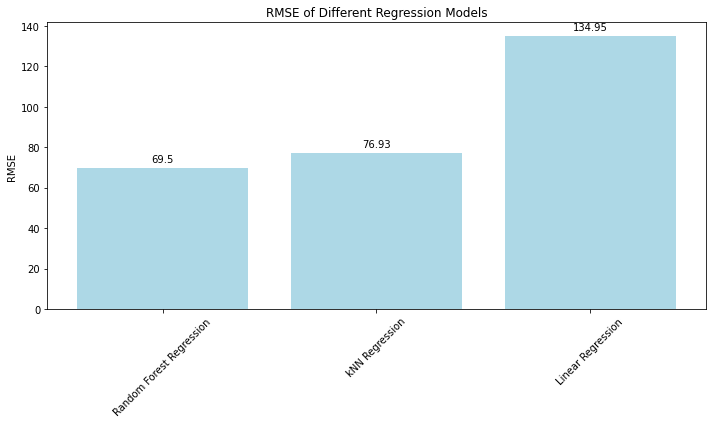

In [91]:
# Create a DataFrame to display the RMSE results
rmse_df = pd.DataFrame({
    'Model': ['Linear Regression', 'kNN Regression', 'Random Forest Regression'],
    'RMSE': [linear_rmse_ma, knn_rmse, random_rmse]
})

# Sort the dataframe in ascending order of RMSE
rmse_df_sorted = rmse_df.sort_values(by='RMSE')

# Plotting the data
plt.figure(figsize=(10, 6))
bars = plt.bar(rmse_df_sorted['Model'], rmse_df_sorted['RMSE'], color='lightblue')
plt.ylabel('RMSE')
plt.title('RMSE of Different Regression Models')
plt.xticks(rotation=45)

# Label the bars with the RMSE values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
# Insights derived from the RMSE table based on the provided descriptive statistics of the target variable:

# Linear Regression:
# - The RMSE (76.51 MW) being in the same unit as the target variable, 
#   tells us that on average, the model's predictions are off by about 76.51 MW from the actual values.
# - Comparison with Data Range: The demand data spans from 4092.71 MW to 5169.83 MW, 
#   giving a total range of 1077.12 MW. The RMSE of 76.51 MW is much smaller than the range of the data. 
#   This indicates that the model's predictions are relatively close to the actual values.
# - Comparison with Standard Deviation: The standard deviation of the demand data is 250.42 MW. 
#   The RMSE of 76.51 MW is substantially smaller than this standard deviation, 
#   suggesting that the model's predictions are reasonably accurate relative to the inherent variability in the data.

# kNN Regression:
# - The RMSE of 76.93 MW means that on average, the predictions of the kNN model deviate 
#   by this amount from the actual values.
# - Comparison with Data Range: The RMSE is small compared to the data's range, 
#   suggesting that the kNN model's predictions are relatively accurate.
# - Comparison with Standard Deviation: The RMSE is roughly 0.31 times the standard deviation 
#   of the demand data, indicating that the prediction errors of the kNN model are minimal 
#   compared to the variability of the data.

# Random Forest Regression:
# - The RMSE of 69.49 MW shows that, on average, the Random Forest model's predictions 
#   are off by this magnitude from the true values.
# - Comparison with Data Range: The RMSE is much smaller than the range of the demand data, 
#   suggesting accurate predictions by the model.
# - Comparison with Standard Deviation: The RMSE is about 0.28 times the standard deviation 
#   of the data, indicating that the Random Forest model's predictions are quite accurate considering 
#   the data's natural variability.

# Most Predictive Model: The Random Forest Regression model has the lowest RMSE, 
# making it the most predictive among the three models in this context.
# Least Predictive Model: The kNN Regression model, with a slightly higher RMSE than the Random Forest model but 
# lower than the Linear Regression model, appears to be in the middle in terms of prediction accuracy.

# Overall Insights:
# Considering the RMSE values in relation to the provided descriptive statistics of the demand data, 
# the models are performing reasonably well for this dataset. 
# The prediction errors, on average, are small when compared to the natural variability and range of the data. 
# Among the models, the Random Forest Regression stands out as the most predictive.

In [95]:
# Advantages on Moving Averages:

# Pros:
# 1. Smoothing: Moving averages help in smoothing out short-term fluctuations, noise, or volatility in data.
# 2. Trend Identification: They can highlight underlying trends over a specified period, making it easier to identify upward or downward movements.
# 3. Lag Reduction: Shorter period moving averages can reduce the lag effect, making them more responsive to recent data changes.

# Cons:
# 1. Lag: Moving averages inherently introduce a lag because they are based on past values. The longer the period of the moving average, the greater the lag.
# 2. Less Responsive to Significant Changes: If there's a significant event leading to a sudden change in the data, a moving average might downplay its impact, especially if it's set over a longer period.
# 3. Loss of Information: By smoothing the data, some granularity and details of the original data might be lost.

In [ ]:
weather_demand_df.to_csv('weather_demand_df.csv', index=False)